#### Machine Learning, regression

<small>

#### There are several types of regression techniques, each suited for different scenarios:

##### 1. Linear Regression
- Assumes a **linear relationship** between input features (X) and output (y).  
- **Example:** predicting house prices based on square footage.  
- **Types:**
  - Simple Linear Regression → one independent variable.  
  - Multiple Linear Regression → multiple independent variables.  

---

##### 2. Polynomial Regression
- Extends linear regression by adding **polynomial terms** (e.g., x², x³).  
- Useful when the data shows a **curved/non-linear relationship**.  

---

##### 3. Ridge Regression (L2 Regularization)
- A form of linear regression with **penalty on large coefficients** to reduce overfitting.  
- Keeps all features but shrinks their impact.  

---

##### 4. Lasso Regression (L1 Regularization)
- Similar to Ridge, but it can **shrink some coefficients to zero**, effectively performing **feature selection**.  

---

##### 5. Elastic Net Regression
- Combination of **Lasso and Ridge**.  
- Useful when features are **highly correlated**.  

---

##### 6. Logistic Regression (for classification)
- Despite its name, it’s used for **classification**, not regression.  
- Predicts probabilities using a **sigmoid function**.  
- **Example:** predicting if a student passes (yes/no) based on study hours.  

---

##### 7. Quantile Regression
- Estimates conditional **quantiles** (like median or 90th percentile) instead of the mean.  
- Useful for **skewed distributions** or **outliers**.  

---

##### 8. Bayesian Regression
- Uses **probability distributions** instead of fixed coefficients.  
- Useful when we want to model **uncertainty** in predictions.  

---

##### 9. Stepwise Regression
- Automatically selects features based on **statistical significance**.  
- **Types:**
  - Forward selection  
  - Backward elimination  

---

########10. Non-Linear Regression
- For relationships that can’t be well captured by linear or polynomial functions.  
- **Example:** exponential, logarithmic, or power-law relationships.  

---

########11. Decision Tree & Random Forest Regression
- Uses **tree-based models** to predict continuous outcomes.  
- Captures **non-linear, complex relationships** well.  

---

########12. Support Vector Regression (SVR)
- Extension of **Support Vector Machines** for regression tasks.  
- Works well for **high-dimensional spaces** and **non-linear problems**.  

</small>

In [170]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression, BayesianRidge

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.datasets import make_regression, make_classification, load_diabetes

import statsmodels.api as sm
from statsmodels.formula.api import quantreg

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

from scipy import stats

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

##### 📌 Linear Regression in Machine Learning  

<small>

##### 🔹 What is Linear Regression?  
Linear Regression is one of the **simplest and most widely used supervised learning algorithms**.  
It models the relationship between a **dependent variable (Y)** and one or more **independent variables (X)** by fitting a straight line (in higher dimensions, a hyperplane).  

The main idea:  

\[
Y=β0​+β1​X1​+β2​X2​+⋯+βn​Xn​+ϵ
\]

Where:  
- \(Y\): Dependent variable (output we want to predict)  
- \(X_i\): Independent variables (features)  
- \(β0\): Intercept (bias term)  
- \(β_i\): Coefficients (weights) for each feature  
- \(ϵ\): Error term (difference between actual & predicted value)  

---

##### 🔹 Types of Linear Regression
1. **Simple Linear Regression**  
   - One independent variable (X) and one dependent variable (Y).  
   - Equation:  
     \[
     Y = \beta_0 + \beta_1X + \epsilon
     \]  
   - **Example:** Predicting salary based on years of experience.  

2. **Multiple Linear Regression**  
   - More than one independent variable.  
   - Equation:  
     \[
     Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_nX_n + \epsilon
     \]  
   - **Example:** Predicting house price based on size, number of rooms, and location.  

---

##### 🔹 Assumptions of Linear Regression
For Linear Regression to give **valid results**, these assumptions should ideally hold:  

1. **Linearity** → Relationship between X and Y should be linear.  
2. **Independence** → Observations should be independent of each other.  
3. **Homoscedasticity** → Constant variance of residuals (errors).  
4. **Normality of Errors** → Residuals should be normally distributed.  
5. **No Multicollinearity** → Independent variables should not be highly correlated with each other.  

---

##### 🔹 How it Works (Mathematics Behind It)
The algorithm finds the **best-fit line** by minimizing the error using **Ordinary Least Squares (OLS)**:  

\[
Minimize ∑(Yi​−Yi^)​^​2
\]

Where:  
- \(Y_i\): Actual value  
- \(\hat{Y_i}\): Predicted value  

This is known as **Residual Sum of Squares (RSS)**.  

---

##### 🔹 Advantages
- Simple to understand and implement.  
- Computationally efficient.  
- Works well for linearly separable data.  
- Coefficients are interpretable (shows feature importance).  

---

##### 🔹 Disadvantages
- Assumes linearity (fails on non-linear data).  
- Sensitive to **outliers**.  
- Assumes data meets all assumptions (which may not always be true).  
- Can **underfit** if relationships are complex.  

---

##### 🔹 Use Cases
- Predicting house prices 🏠  
- Sales forecasting 📈  
- Risk assessment in finance 💰  
- Predicting temperature 🌡️  

---
</small>

In [3]:
# Load the diabetes dataset
diabetes = load_diabetes()

In [4]:
X, y = diabetes.data, diabetes.target
feature_names = diabetes.feature_names

In [8]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
# Use BMI feature (index 2)
X_bmi = X_train_scaled[:, 2].reshape(-1, 1)
X_bmi_test = X_test_scaled[:, 2].reshape(-1, 1)

In [62]:
simple_lr = LinearRegression()
simple_lr.fit(X_bmi, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [63]:
simple_pred = simple_lr.predict(X_bmi_test)

In [64]:
print(f"Coefficient: {simple_lr.coef_}")
print(f"Intercept: {simple_lr.intercept_:.4f}")
print(f"R² Score: {r2_score(y_test, simple_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, simple_pred):.4f}")

Coefficient: [47.14112176]
Intercept: 153.7365
R² Score: 0.2334
MSE: 4061.8259


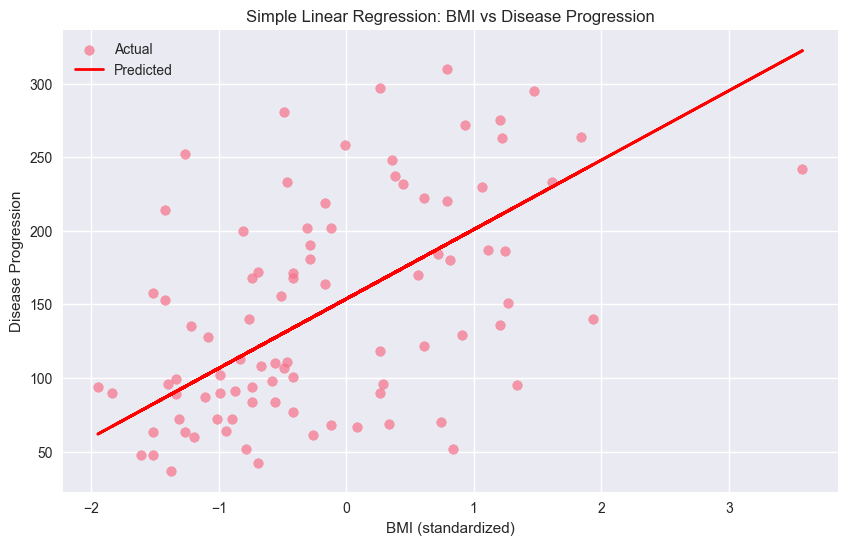

In [65]:
# Plot simple linear regression
plt.figure(figsize=(10, 6))

plt.scatter(X_bmi_test, y_test, alpha=0.7, label="Actual")
plt.plot(X_bmi_test, simple_pred, color="red", linewidth=2, label="Predicted")

plt.xlabel("BMI (standardized)")
plt.ylabel("Disease Progression")
plt.title("Simple Linear Regression: BMI vs Disease Progression")
plt.legend()
plt.grid(True)

######## Multiple Linear Regression

In [66]:
multiple_lr = LinearRegression()
multiple_lr.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [67]:
multiple_pred = multiple_lr.predict(X_test_scaled)

In [72]:
print(f"Coefficients: {multiple_lr.coef_}")
print(f"Intercept: {multiple_lr.intercept_}")
print(f"R² Score: {r2_score(y_test, multiple_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, multiple_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, multiple_pred):.4f}")

Coefficients: [  1.75375799 -11.51180908  25.60712144  16.82887167 -44.44885564
  24.64095356   7.67697768  13.1387839   35.16119521   2.35136365]
Intercept: 153.73654390934846
R² Score: 0.4526
MSE: 2900.1936
MAE: 42.7941


In [77]:
# Cross-validation
cv_scores = cross_val_score(multiple_lr, X_train_scaled, y_train, cv=5, scoring='r2')

In [78]:
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Average CV R²: {cv_scores.mean():.4f}")

Cross-validation R² scores: [0.54760189 0.36123934 0.50481226 0.61773622 0.21489265]
Average CV R²: 0.4493


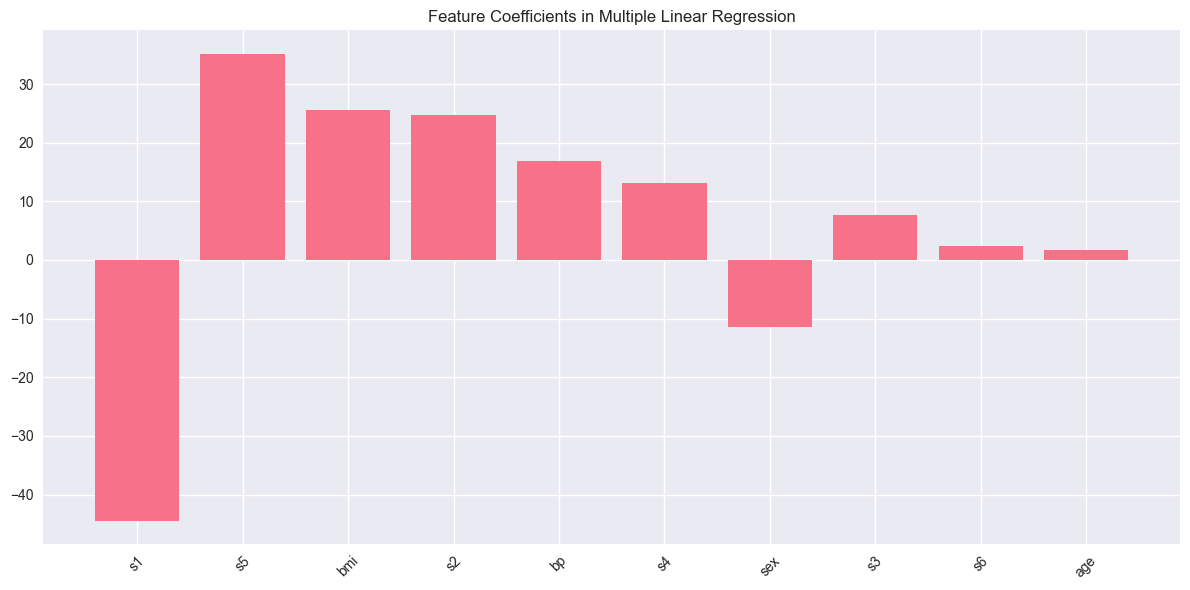

In [79]:
# Plot feature coefficients
plt.figure(figsize=(12, 6))
coefficients = pd.DataFrame(
    {"Feature": feature_names, "Coefficient": multiple_lr.coef_}
)
coefficients = coefficients.sort_values("Coefficient", key=abs, ascending=False)
plt.bar(coefficients["Feature"], coefficients["Coefficient"])
plt.xticks(rotation=45)
plt.title("Feature Coefficients in Multiple Linear Regression")
plt.tight_layout()
plt.show()

<small>

##### 📌 Polynomial Regression in Machine Learning  

##### 🔹 What is Polynomial Regression?  
Polynomial Regression is a type of **regression analysis** where the relationship between the independent variable (X) and the dependent variable (Y) is modeled as an **nth-degree polynomial**.  

Unlike **Linear Regression**, which assumes a straight-line relationship, Polynomial Regression allows the curve to bend and capture **non-linear patterns**.  

The equation is:  

\[
Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \cdots + \beta_nX^n + \epsilon
\]

Where:  
- \(Y\) = Dependent variable (target)  
- \(X\) = Independent variable (feature)  
- \(\beta_0\) = Intercept  
- \(\beta_1, \beta_2, ..., \beta_n\) = Coefficients for each polynomial term  
- \(\epsilon\) = Error term  

---

##### 🔹 Why Polynomial Regression?  
- Many real-world problems are **non-linear**.  
- Linear regression may **underfit** such data, while polynomial regression can fit the curves better.  
- Examples: growth rates, physics-based curves, economic trends, disease progression.  

---

##### 🔹 Example  
Suppose we want to predict the **salary of an employee** based on their years of experience.  
- Linear regression may give a straight line.  
- Polynomial regression can fit a curve that matches promotions and salary jumps.  

---

##### 🔹 Key Characteristics
1. **Flexibility** → Can fit non-linear data by increasing the polynomial degree.  
2. **Higher-degree terms** (like \(X^2, X^3\)) allow capturing complex relationships.  
3. If degree is too high, it may lead to **overfitting**.  

---

##### 🔹 Advantages
- Captures **non-linear relationships**.  
- More accurate than simple linear regression for curved data.  
- Easy to implement (just transform features).  

---

##### 🔹 Disadvantages
- **Overfitting** if polynomial degree is too high.  
- Extrapolation (predictions outside the range) can be very **unreliable**.  
- Interpretation of coefficients is not straightforward.  

---

##### 🔹 When to Use?
- When data shows **curved trends** rather than straight-line relationships.  
- Useful in domains like **biology, physics, finance, and social sciences**.  

---

</small>

In [81]:
# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

In [82]:
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [83]:
poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [84]:
poly_pred = poly_lr.predict(X_test_poly)

In [86]:
print(f"Coefficients: {poly_lr.coef_[:5]}")
print(f"Intercept: {poly_lr.intercept_}")
print(f"R² Score: {r2_score(y_test, poly_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, poly_pred):.4f}")
print(f"Number of features: {X_train_poly.shape[1]}")

Coefficients: [   5.63831686  -14.32333315   20.23823565   18.88863908 -811.13770613]
Intercept: 66.05464285635188
R² Score: 0.4156
MSE: 3096.0283
Number of features: 65


In [87]:
# Compare with linear regression
print(
    f"Improvement over linear regression: {r2_score(y_test, poly_pred) - r2_score(y_test, multiple_pred):.4f}"
)

Improvement over linear regression: -0.0370


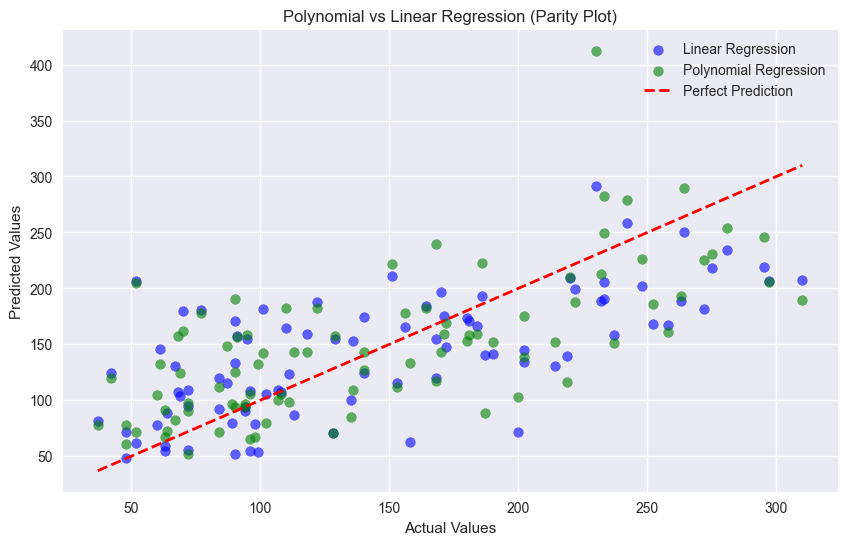

In [94]:
# Visualize polynomial vs linear regression (parity plot)
plt.figure(figsize=(10, 6))

# Linear Regression predictions
plt.scatter(y_test, multiple_pred, alpha=0.6, color="blue", label="Linear Regression")

# Polynomial Regression predictions
plt.scatter(y_test, poly_pred, alpha=0.6, color="green", label="Polynomial Regression")

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2, label="Perfect Prediction")

# Labels and formatting
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Polynomial vs Linear Regression (Parity Plot)")
plt.legend()
plt.grid(True)
plt.show()


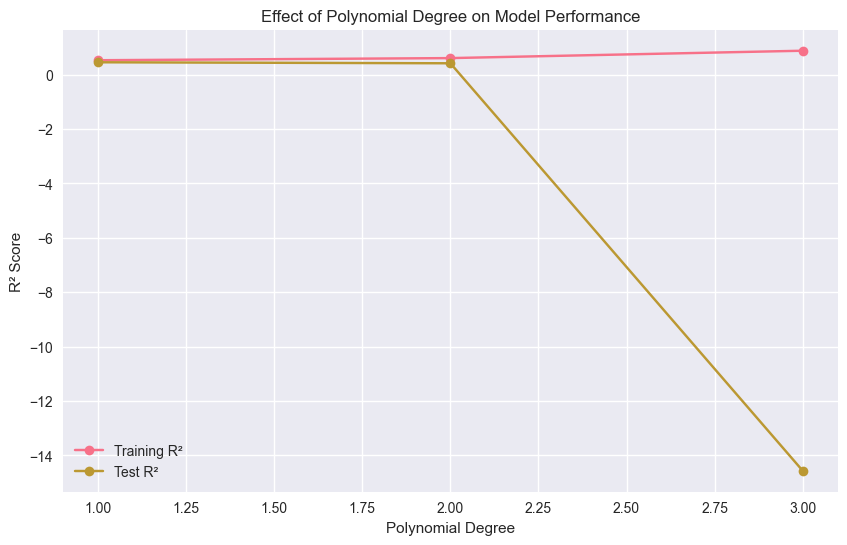

In [89]:

# Test different polynomial degrees
degrees = range(1, 4)
train_scores = []
test_scores = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    train_pred = model.predict(X_train_poly)
    test_pred = model.predict(X_test_poly)

    train_scores.append(r2_score(y_train, train_pred))
    test_scores.append(r2_score(y_test, test_pred))

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_scores, "o-", label="Training R²")
plt.plot(degrees, test_scores, "o-", label="Test R²")
plt.xlabel("Polynomial Degree")
plt.ylabel("R² Score")
plt.title("Effect of Polynomial Degree on Model Performance")
plt.legend()
plt.grid(True)
plt.show()

<small>

######## ✅ Interpretation

- R² = 1 → Perfect fit (model explains 100% of the variance).
- R² = 0 → Model does not explain any variance (like predicting just the mean).
- R² < 0 → Worse than a horizontal line (bad fit).

<small>

###### 📘 Ridge Regression (L2 Regularization)

Ridge Regression is a **regularization technique** used to prevent **overfitting** in linear regression models.  
It is also known as **L2 Regularization** because it adds a penalty proportional to the square of the magnitude of coefficients.

---

##### 🔹 Why Ridge Regression?
- In simple **Linear Regression**, the model tries to minimize the **Sum of Squared Errors (SSE)**.  
- If the dataset has **multicollinearity** (highly correlated features) or **many features**, the model can overfit.  
- Ridge Regression addresses this problem by adding a **penalty term** to the cost function.

---

##### 🔹 Ridge Regression Cost Function

The cost function in Ridge Regression is:

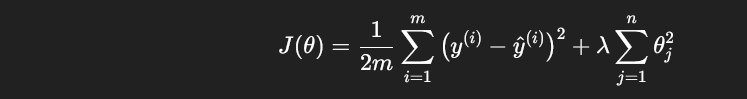

Where:
- \( y_i \) = Actual value  
- \( \hat{y_i} \) = Predicted value  
- \( \beta_j \) = Model coefficients  
- \( \lambda \) = Regularization parameter (controls strength of penalty)  

👉 Compared to ordinary least squares (OLS), Ridge adds the penalty term \( \lambda \sum \beta_j^2 \).

---

##### 🔹 Effect of the Regularization Parameter (\(\lambda\))
- If **λ = 0** → Ridge Regression = Linear Regression (no penalty).  
- If **λ → ∞** → Coefficients shrink toward **0** (but never exactly zero).  
- Higher **λ** = Stronger penalty = Smaller coefficients.

---

##### 🔹 Properties of Ridge Regression
✅ Shrinks coefficients but **does not eliminate features** (unlike Lasso).  
✅ Works well when there are **many small/medium correlated features**.  
✅ Reduces variance but introduces some bias (Bias-Variance tradeoff).  
✅ Helps improve **R² score** and **generalization** on test data.  

---

##### 🔹 Ridge vs Lasso
| Feature          | Ridge (L2) | Lasso (L1) |
|------------------|------------|------------|
| Penalty          | Sum of squares of coefficients | Sum of absolute values of coefficients |
| Coefficients     | Shrinks but never 0 | Some coefficients become exactly 0 |
| Feature Selection| ❌ No       | ✅ Yes (performs feature selection) |
| Best use case    | Multicollinearity | High-dimensional sparse data |

---

</small>


In [95]:
# Test different alpha values
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
ridge_scores = []
ridge_coefs = []

In [96]:
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    ridge_pred = ridge.predict(X_test_scaled)
    ridge_scores.append(r2_score(y_test, ridge_pred))
    ridge_coefs.append(ridge.coef_)

In [97]:
# Find best alpha
best_alpha = alphas[np.argmax(ridge_scores)]
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)

print(f"Best alpha: {best_alpha}")
print(f"R² Score: {r2_score(y_test, ridge_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, ridge_pred):.4f}")

Best alpha: 100
R² Score: 0.4605
MSE: 2858.2243


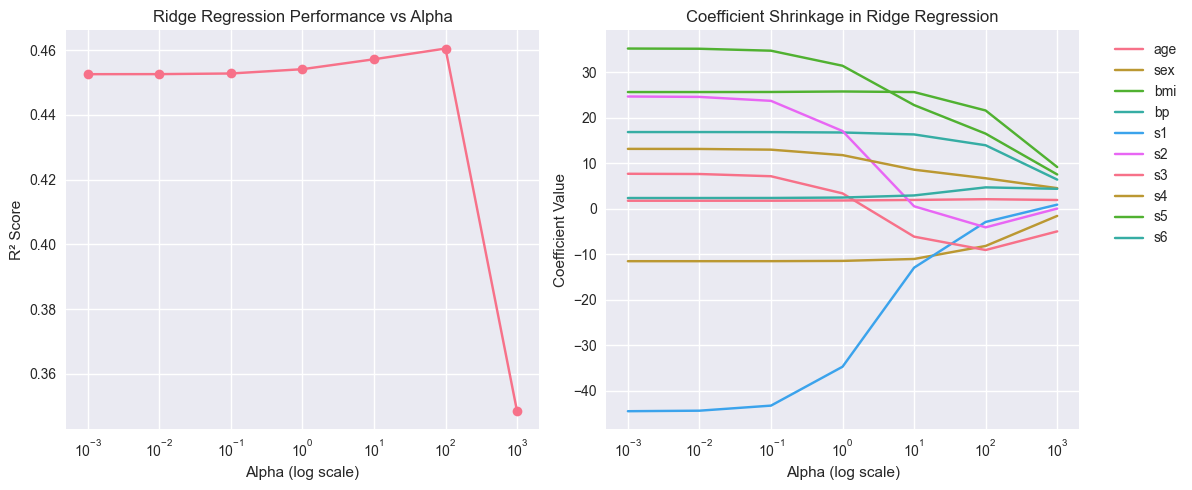

In [98]:
# Plot performance vs alpha
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.semilogx(alphas, ridge_scores, "o-")
plt.xlabel("Alpha (log scale)")
plt.ylabel("R² Score")
plt.title("Ridge Regression Performance vs Alpha")
plt.grid(True)

plt.subplot(1, 2, 2)
for i, feature in enumerate(feature_names):
    coef_values = [coef[i] for coef in ridge_coefs]
    plt.semilogx(alphas, coef_values, label=feature)
plt.xlabel("Alpha (log scale)")
plt.ylabel("Coefficient Value")
plt.title("Coefficient Shrinkage in Ridge Regression")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)

plt.tight_layout()
plt.show()

In [99]:
# Compare with linear regression
print(
    f"Improvement over linear regression: {r2_score(y_test, ridge_pred) - r2_score(y_test, multiple_pred):.4f}"
)

Improvement over linear regression: 0.0079


##### 📌 Lasso Regression (L1 Regularization)

<small>

##### 🔹 Introduction
**Lasso Regression** (Least Absolute Shrinkage and Selection Operator) is a type of **linear regression** that uses **L1 regularization**.  
It adds a penalty equal to the **absolute value of the magnitude of coefficients**.  

This penalty term forces some coefficients to become exactly **zero**, making it useful for **feature selection**.

---

##### 🔹 Lasso Regression Cost Function
The cost function for Lasso Regression is:

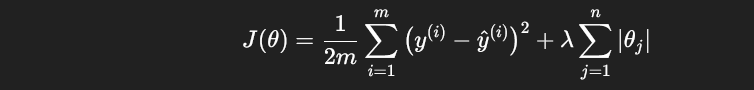

Where:
- \( m \): Number of training examples  
- \( y^{(i)} \): Actual output for the \(i^{th}\) example  
- \( \hat{y}^{(i)} \): Predicted output  
- \( \theta_j \): Coefficients (weights)  
- \( \lambda \): Regularization parameter (controls penalty strength)

---

##### 🔹 Key Characteristics
- **L1 Regularization** adds penalty proportional to the absolute value of coefficients.  
- Encourages **sparsity**: some coefficients become **exactly zero**.  
- Performs **automatic feature selection**.  
- Useful when you expect **only a few features to be important**.  

---

##### 🔹 Comparison with Ridge Regression
| Feature | Ridge Regression (L2) | Lasso Regression (L1) |
|---------|------------------------|------------------------|
| Penalty | Sum of squares of coefficients | Sum of absolute values of coefficients |
| Coefficients | Shrinks but rarely zero | Can shrink to zero (feature selection) |
| Use Case | When most/all features matter | When only few features matter |

---

##### 🔹 Advantages
✅ Can perform **feature selection**  
✅ Prevents overfitting  
✅ Works well with **high-dimensional datasets**

---

##### 🔹 Limitations
⚠️ Can struggle when features are highly correlated  
⚠️ If number of features > number of samples, Lasso may select at most \(m\) variables

---

##### 🔹 Use Cases
- **High-dimensional data** (e.g., genomics, text data)  
- **Feature selection** in machine learning pipelines  
- **Sparse models** where interpretability is important  

---

</small>

In [100]:
# Test different alpha values
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
lasso_scores = []
lasso_coefs = []
selected_features_count = []

In [101]:
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    lasso_pred = lasso.predict(X_test_scaled)
    lasso_scores.append(r2_score(y_test, lasso_pred))
    lasso_coefs.append(lasso.coef_)
    selected_features_count.append(np.sum(lasso.coef_ != 0))

In [102]:
# Find best alpha
best_alpha = alphas[np.argmax(lasso_scores)]
lasso = Lasso(alpha=best_alpha, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)

print(f"Best alpha: {best_alpha}")
print(f"R² Score: {r2_score(y_test, lasso_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, lasso_pred):.4f}")
print(f"Number of features selected: {np.sum(lasso.coef_ != 0)} out of {X.shape[1]}")

Best alpha: 1
R² Score: 0.4669
MSE: 2824.5681
Number of features selected: 9 out of 10


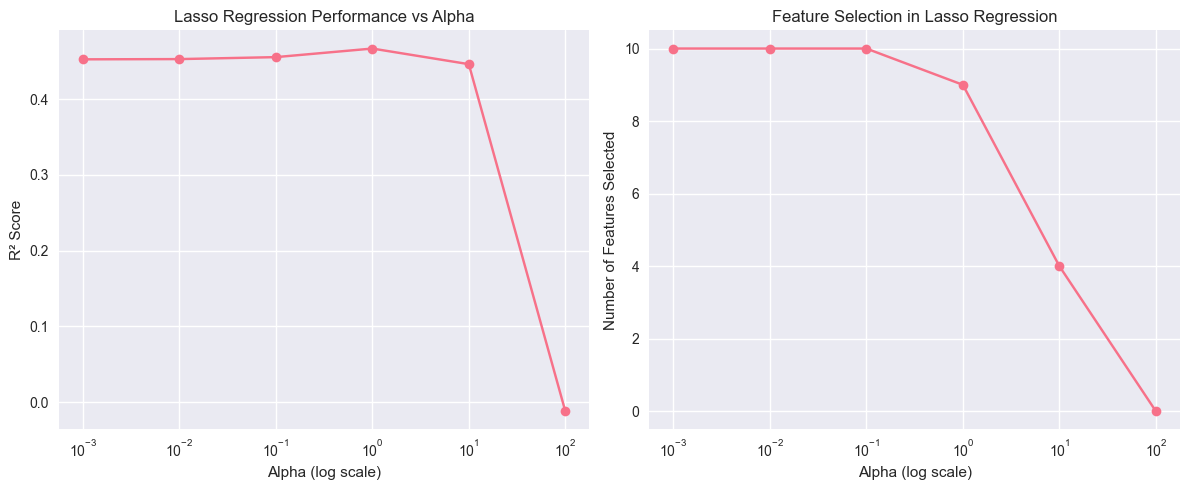

In [103]:
# Plot performance vs alpha
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.semilogx(alphas, lasso_scores, "o-")
plt.xlabel("Alpha (log scale)")
plt.ylabel("R² Score")
plt.title("Lasso Regression Performance vs Alpha")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.semilogx(alphas, selected_features_count, "o-")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Number of Features Selected")
plt.title("Feature Selection in Lasso Regression")
plt.grid(True)

plt.tight_layout()
plt.show()

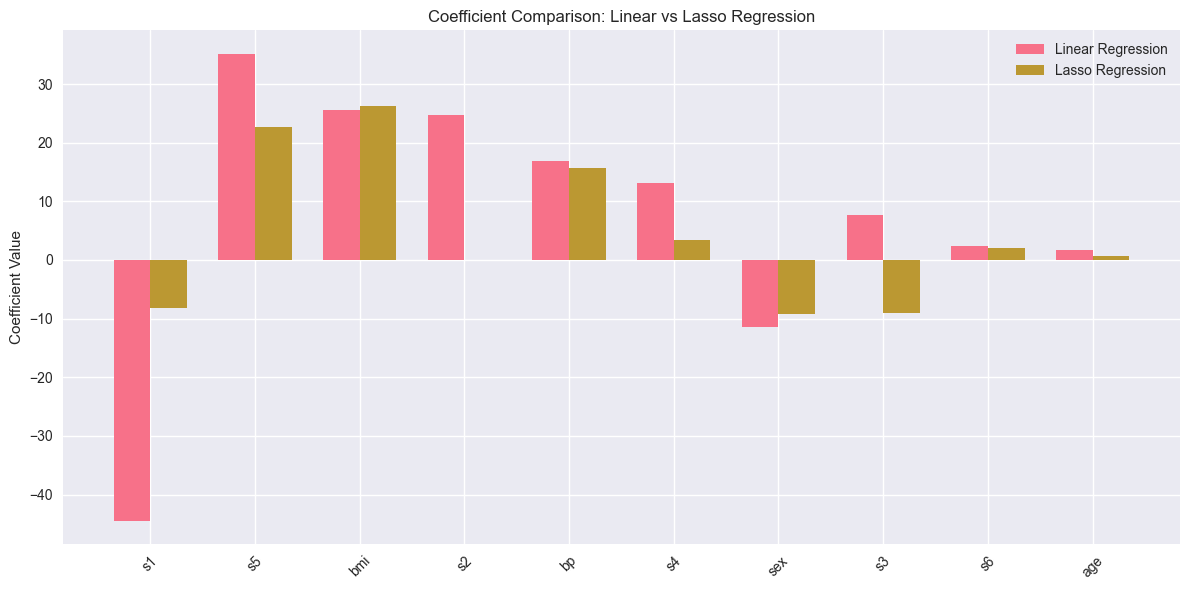

In [104]:
# Compare coefficients with linear regression
plt.figure(figsize=(12, 6))
coef_comparison = pd.DataFrame(
    {"Feature": feature_names, "Linear": multiple_lr.coef_, "Lasso": lasso.coef_}
)
coef_comparison = coef_comparison.sort_values("Linear", key=abs, ascending=False)

x = np.arange(len(coef_comparison))
width = 0.35

plt.bar(x - width / 2, coef_comparison["Linear"], width, label="Linear Regression")
plt.bar(x + width / 2, coef_comparison["Lasso"], width, label="Lasso Regression")
plt.xticks(x, coef_comparison["Feature"], rotation=45)
plt.ylabel("Coefficient Value")
plt.title("Coefficient Comparison: Linear vs Lasso Regression")
plt.legend()
plt.tight_layout()
plt.show()

##### 📘 Elastic Net Regression

<small>


Elastic Net Regression is a **linear regression technique** that combines both **Ridge Regression (L2 regularization)** and **Lasso Regression (L1 regularization)**.  
It is useful when we want the **benefits of both Ridge and Lasso**:  

- **Ridge (L2):** Shrinks coefficients but never makes them exactly zero.  
- **Lasso (L1):** Can shrink coefficients to zero, effectively performing **feature selection**.  
- **Elastic Net:** Balances between them using a **mixing parameter**.

---

##### 🔹 Elastic Net Cost Function

The Elastic Net objective function is:

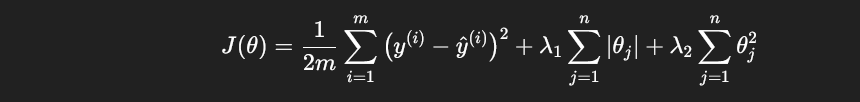

Where:  
- \( m \) → number of training examples  
- \( y^{(i)} \) → actual value of the \(i^{th}\) sample  
- \( \hat{y}^{(i)} \) → predicted value of the \(i^{th}\) sample  
- \( ||\theta||_2^2 \) → L2 norm (sum of squared coefficients → Ridge)  
- \( ||\theta||_1 \) → L1 norm (sum of absolute coefficients → Lasso)  
- \( \alpha \) → regularization strength (controls penalty size)  
- \( \lambda \) → mixing parameter between Ridge and Lasso  
  - If \( \lambda = 0 \), Elastic Net = Ridge  
  - If \( \lambda = 1 \), Elastic Net = Lasso  

---

###### 🔹 Why Elastic Net?

- Handles **multicollinearity** better than Lasso.  
- Encourages **grouping effect**: if multiple features are correlated, Elastic Net tends to select them together.  
- Works well in **high-dimensional datasets** (many features > samples).  
- Provides **feature selection + coefficient shrinkage**.  

---

##### 🔹 Advantages

✅ Combines **Ridge’s stability** with **Lasso’s sparsity**.  
✅ Useful when features are **highly correlated**.  
✅ Can outperform Ridge or Lasso when neither alone is sufficient.  

---

##### 🔹 Disadvantages

⚠️ More computationally expensive than Ridge or Lasso.  
⚠️ Requires tuning **two hyperparameters**: \( \alpha \) and \( \lambda \).  

---
</small>

In [106]:
# Test different alpha and l1_ratio values
alphas = [0.001, 0.01, 0.1, 1, 10]
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]

best_score = -np.inf
best_alpha = None
best_l1_ratio = None

In [107]:
for alpha in alphas:
    for l1_ratio in l1_ratios:
        elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
        elastic_net.fit(X_train_scaled, y_train)
        elastic_pred = elastic_net.predict(X_test_scaled)
        score = r2_score(y_test, elastic_pred)

        if score > best_score:
            best_score = score
            best_alpha = alpha
            best_l1_ratio = l1_ratio

In [108]:
# Train with best parameters
elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, max_iter=10000)
elastic_net.fit(X_train_scaled, y_train)
elastic_pred = elastic_net.predict(X_test_scaled)

print(f"Best alpha: {best_alpha}")
print(f"Best l1_ratio: {best_l1_ratio}")
print(f"R² Score: {r2_score(y_test, elastic_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, elastic_pred):.4f}")
print(
    f"Number of features selected: {np.sum(elastic_net.coef_ != 0)} out of {X.shape[1]}"
)

Best alpha: 1
Best l1_ratio: 0.9
R² Score: 0.4673
MSE: 2822.3092
Number of features selected: 10 out of 10


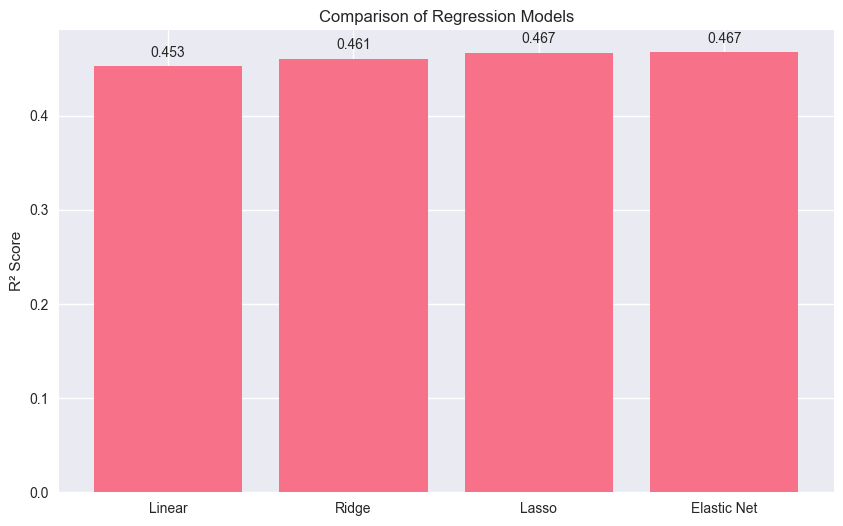

In [109]:
# Compare with Ridge and Lasso
models = ["Linear", "Ridge", "Lasso", "Elastic Net"]
scores = [
    r2_score(y_test, multiple_pred),
    r2_score(y_test, ridge_pred),
    r2_score(y_test, lasso_pred),
    r2_score(y_test, elastic_pred),
]

plt.figure(figsize=(10, 6))
plt.bar(models, scores)
plt.ylabel("R² Score")
plt.title("Comparison of Regression Models")
for i, v in enumerate(scores):
    plt.text(i, v + 0.01, f"{v:.3f}", ha="center")
plt.show()

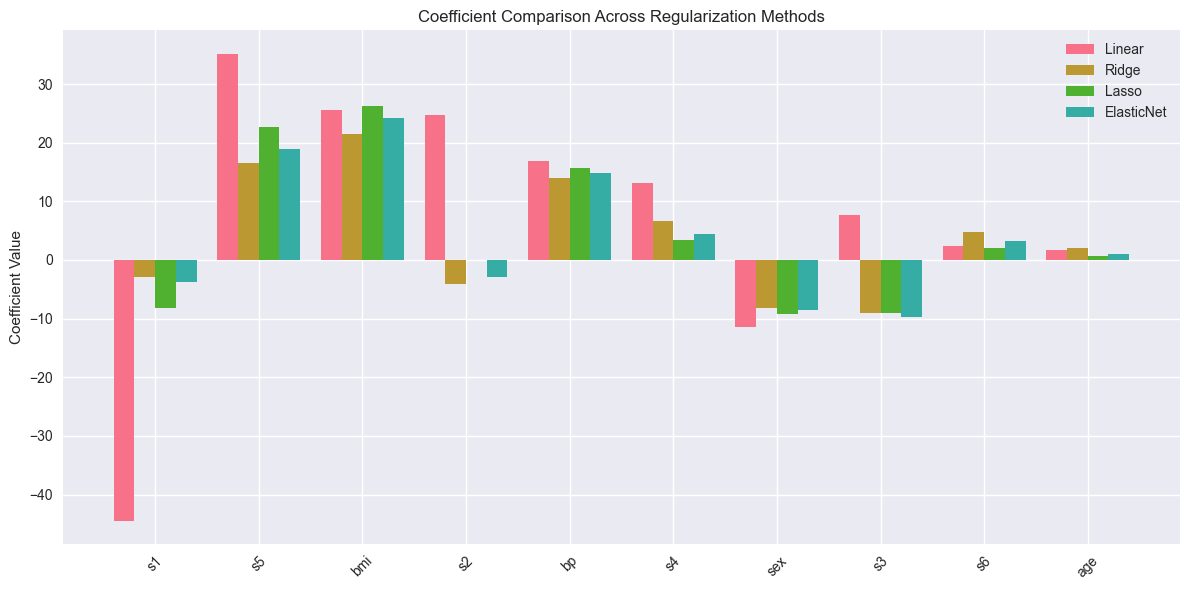

In [110]:
# Compare coefficients
plt.figure(figsize=(12, 6))
coef_comparison = pd.DataFrame(
    {
        "Feature": feature_names,
        "Linear": multiple_lr.coef_,
        "Ridge": ridge.coef_,
        "Lasso": lasso.coef_,
        "ElasticNet": elastic_net.coef_,
    }
)
coef_comparison = coef_comparison.sort_values("Linear", key=abs, ascending=False)

x = np.arange(len(coef_comparison))
width = 0.2

plt.bar(x - width * 1.5, coef_comparison["Linear"], width, label="Linear")
plt.bar(x - width * 0.5, coef_comparison["Ridge"], width, label="Ridge")
plt.bar(x + width * 0.5, coef_comparison["Lasso"], width, label="Lasso")
plt.bar(x + width * 1.5, coef_comparison["ElasticNet"], width, label="ElasticNet")
plt.xticks(x, coef_comparison["Feature"], rotation=45)
plt.ylabel("Coefficient Value")
plt.title("Coefficient Comparison Across Regularization Methods")
plt.legend()
plt.tight_layout()
plt.show()

#### 📊 Quantile Regression

<small>

Quantile Regression is a type of regression analysis used in statistics and econometrics.  
Unlike **Ordinary Least Squares (OLS)**, which estimates the **mean** of the dependent variable given predictors, Quantile Regression estimates the **conditional quantiles** (such as the median or the 90th percentile).  

This makes it useful for understanding the **full distribution** of the target variable, not just its average.

---

##### 🔹 Key Idea
- **OLS Regression**: Minimizes the **sum of squared residuals** → focuses on the mean.
- **Quantile Regression**: Minimizes a function of the **absolute residuals** → focuses on different quantiles (e.g., 25th, 50th, 90th percentiles).

For example:
- Median regression (50th percentile) is more **robust to outliers** than OLS.
- 90th percentile regression shows the impact of predictors on the **upper tail** of the distribution.

---

##### 🔹 Quantile Loss Function
For a quantile `q ∈ (0,1)` (e.g., 0.5 for the median), the **Quantile Loss Function** is defined as:

$$
\rho_q(u) =
\begin{cases}
q \cdot u & \text{if } u \geq 0 \\
(q - 1) \cdot u & \text{if } u <small 0
\end{cases}
$$

where:
- \( u = y - \hat{y} \) is the residual.

This loss function penalizes **underestimation and overestimation differently**, depending on the quantile.

---

##### 🔹 Quantile Regression Cost Function

$$
J(\theta) = \sum_{i=1}^{m} \rho_q \left( y^{(i)} - h_\theta(x^{(i)}) \right)
$$

where:
- \( m \) = number of training examples  
- \( y^{(i)} \) = actual value  
- \( h_\theta(x^{(i)}) \) = predicted value  
- \( \rho_q \) = quantile loss function  

---

##### 🔹 Advantages
✅ Provides a **more complete view** of the relationship between variables.  
✅ **Robust to outliers** (especially at median regression).  
✅ Useful when the effect of predictors **varies across the distribution** (e.g., income inequality, housing prices).

---

##### 🔹 Disadvantages
⚠️ Computationally more intensive than OLS.  
⚠️ Interpretation is less straightforward compared to mean regression.  
⚠️ Standard errors require bootstrapping (computationally intensive).  
⚠️ Crossing (quantile curves may cross, violating monotonicity).  
⚠️ Less intuitive interpretation for non-technical audiences.

---

##### 🔹 Applications
- **Economics**: Studying income distribution (effect of education on low-income vs. high-income individuals).  
- **Finance**: Risk analysis (e.g., estimating Value at Risk at 5% quantile).  
- **Medicine**: Analyzing effects of treatments across different patient response levels.

</small>

In [114]:
np.random.seed(42)
X_quant = np.random.randn(300, 1) * 2
y_quant = (
    2 * X_quant.flatten() + 1 + np.random.randn(300) * (0.5 + 0.5 * X_quant.flatten())
)

In [120]:
X_quant[:10]

array([[ 0.99342831],
       [-0.2765286 ],
       [ 1.29537708],
       [ 3.04605971],
       [-0.46830675],
       [-0.46827391],
       [ 3.15842563],
       [ 1.53486946],
       [-0.93894877],
       [ 1.08512009]])

In [115]:
X_train_quant, X_test_quant, y_train_quant, y_test_quant = train_test_split(
    X_quant, y_quant, test_size=0.2, random_state=42
)

In [116]:
# Fit quantile regression for different quantiles
quantiles = [0.1, 0.5, 0.9]
models = {}
predictions = {}

for q in quantiles:
    # Add constant for statsmodels
    X_train_sm = sm.add_constant(X_train_quant)
    X_test_sm = sm.add_constant(X_test_quant)

    # Fit quantile regression model
    model = sm.QuantReg(y_train_quant, X_train_sm).fit(q=q)
    models[q] = model
    predictions[q] = model.predict(X_test_sm)

    print(f"\nQuantile {q}:")
    print(f"Intercept: {model.params[0]:.4f}, Slope: {model.params[1]:.4f}")


Quantile 0.1:
Intercept: -0.1895, Slope: 1.8682

Quantile 0.5:
Intercept: 1.0242, Slope: 2.0243

Quantile 0.9:
Intercept: 2.0322, Slope: 2.1565


In [117]:
# Compare with linear regression
lr_quant = LinearRegression()
lr_quant.fit(X_train_quant, y_train_quant)
lr_pred_quant = lr_quant.predict(X_test_quant)

print(f"\nLinear Regression:")
print(f"Intercept: {lr_quant.intercept_:.4f}, Slope: {lr_quant.coef_[0]:.4f}")


Linear Regression:
Intercept: 0.9754, Slope: 2.0258


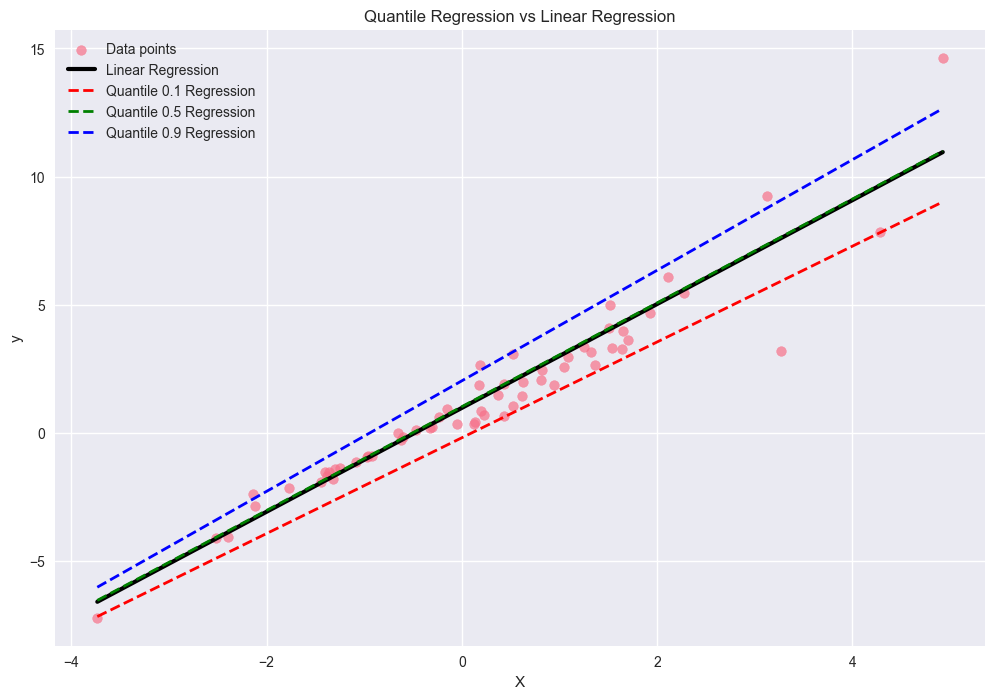

In [118]:
# Plot the results
plt.figure(figsize=(12, 8))

# Sort for plotting
sort_idx = np.argsort(X_test_quant.flatten())
X_sorted = X_test_quant[sort_idx].flatten()

plt.scatter(X_test_quant, y_test_quant, alpha=0.7, label="Data points")
plt.plot(
    X_sorted, lr_pred_quant[sort_idx], "k-", label="Linear Regression", linewidth=3
)

colors = ["red", "green", "blue"]
for i, q in enumerate(quantiles):
    plt.plot(
        X_sorted,
        predictions[q][sort_idx],
        color=colors[i],
        linestyle="--",
        label=f"Quantile {q} Regression",
        linewidth=2,
    )

plt.xlabel("X")
plt.ylabel("y")
plt.title("Quantile Regression vs Linear Regression")
plt.legend()
plt.grid(True)
plt.show()

In [119]:
# Compare performance at different quantiles
for q in quantiles:
    mae = mean_absolute_error(y_test_quant, predictions[q])
    print(f"Quantile {q} - MAE: {mae:.4f}")

print(
    f"Linear Regression - MAE: {mean_absolute_error(y_test_quant, lr_pred_quant):.4f}"
)

Quantile 0.1 - MAE: 1.1723
Quantile 0.5 - MAE: 0.6123
Quantile 0.9 - MAE: 1.3018
Linear Regression - MAE: 0.6058


####  📊 Bayesian Regression

<small>

Bayesian Regression is a statistical technique that applies **Bayesian inference** to linear regression models.  
Instead of estimating a single fixed set of parameters (like Ordinary Least Squares), it treats the **parameters as probability distributions** and updates them as new data becomes available.  

---

##### 🔹 Key Idea
- In **classical regression (OLS, Ridge, etc.)**, we find fixed values for the model parameters (`β`).
- In **Bayesian regression**, we assume the parameters come from a **prior distribution** and update them into a **posterior distribution** after observing the data.

Mathematically:

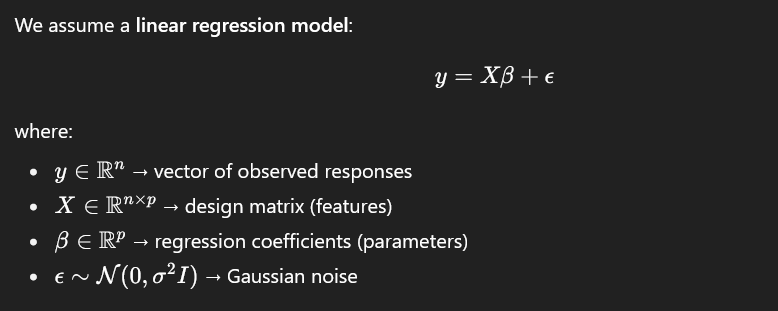
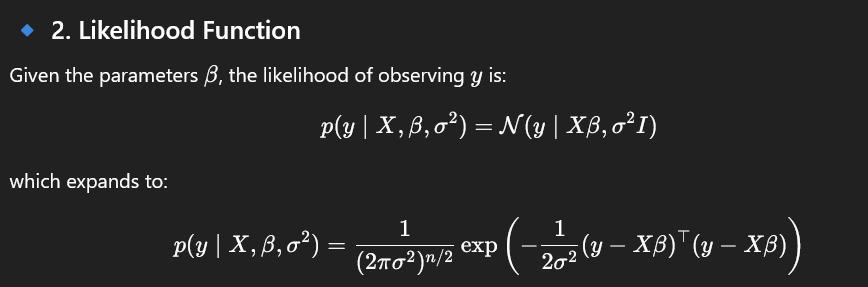
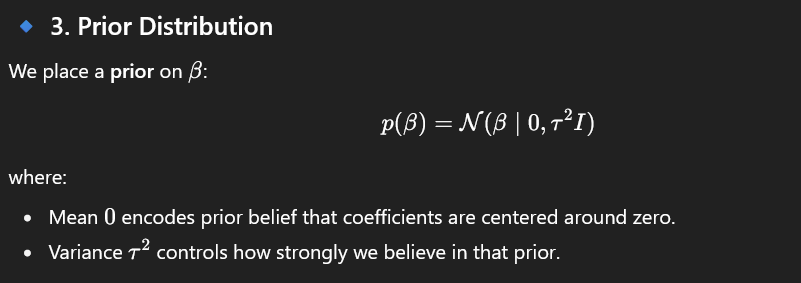
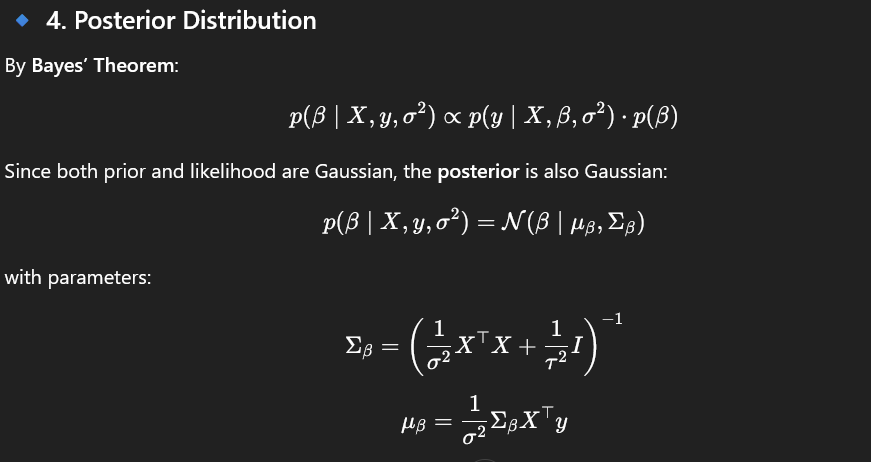
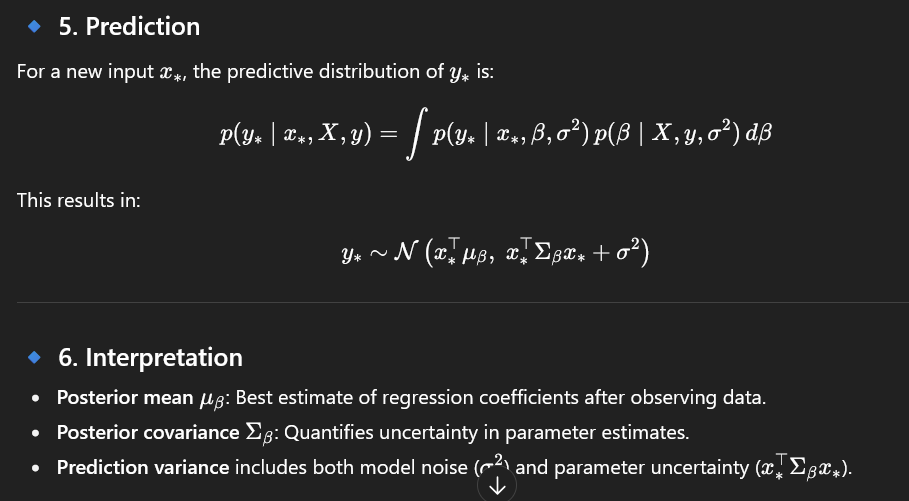







---

##### 🔹 Why Bayesian Regression?
1. **Uncertainty estimation**: Instead of a single coefficient estimate, you get a **distribution** (credible intervals).  
2. **Regularization**: Priors can act as regularizers (e.g., Gaussian priors → Ridge Regression).  
3. **Flexibility**: Naturally extends to non-linear models and hierarchical models.  
4. **Sequential learning**: Easy to update when new data arrives.  

---

##### 🔹 Connection to Other Regressions
- If you use a **Gaussian prior** on coefficients → equivalent to **Ridge Regression**.  
- If you use a **Laplace prior** → equivalent to **Lasso Regression**.  
- If you use a **non-informative prior** → reduces to **Ordinary Least Squares (OLS)**.  

---

##### 🔹 Example Workflow
1. Define prior belief about parameters (`β ~ N(0, σ²)`).
2. Define likelihood of data (`y ~ N(Xβ, σ²)`).
3. Apply Bayes’ theorem to compute posterior.
4. Use posterior distribution for predictions and uncertainty intervals.

---

##### 🔹 Pros and Cons
###### ✅ Advantages
- Provides **uncertainty quantification**.  
- Naturally incorporates prior knowledge.  
- Handles small datasets better.  
- Good for sequential/online learning.  

###### ⚠️ Disadvantages
- Computationally expensive for large datasets.  
- Requires choosing appropriate priors.  
- Interpretation can be more complex than OLS.  

---

##### 🔹 Applications
- Forecasting with uncertainty.  
- Medical studies (where prior knowledge is crucial).  
- Bayesian Machine Learning models.  
- Time series with uncertainty intervals.  

---

##### 🔹 Summary
- **Bayesian Regression = Priors + Likelihood → Posterior**.  
- Instead of point estimates, you get distributions.  
- Provides uncertainty, flexibility, and interpretability.  


</small>

In [121]:
# Bayesian Ridge Regression
bayesian_reg = BayesianRidge()
bayesian_reg.fit(X_train_scaled, y_train)
bayesian_pred = bayesian_reg.predict(X_test_scaled)

In [122]:
print(f"R² Score: {r2_score(y_test, bayesian_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, bayesian_pred):.4f}")

R² Score: 0.4579
MSE: 2871.9431


In [123]:
# Get uncertainty estimates
y_mean, y_std = bayesian_reg.predict(X_test_scaled, return_std=True)

print(f"Average uncertainty (std): {y_std.mean():.4f}")
print(f"Max uncertainty (std): {y_std.max():.4f}")
print(f"Min uncertainty (std): {y_std.min():.4f}")

Average uncertainty (std): 55.0866
Max uncertainty (std): 56.0798
Min uncertainty (std): 54.6456


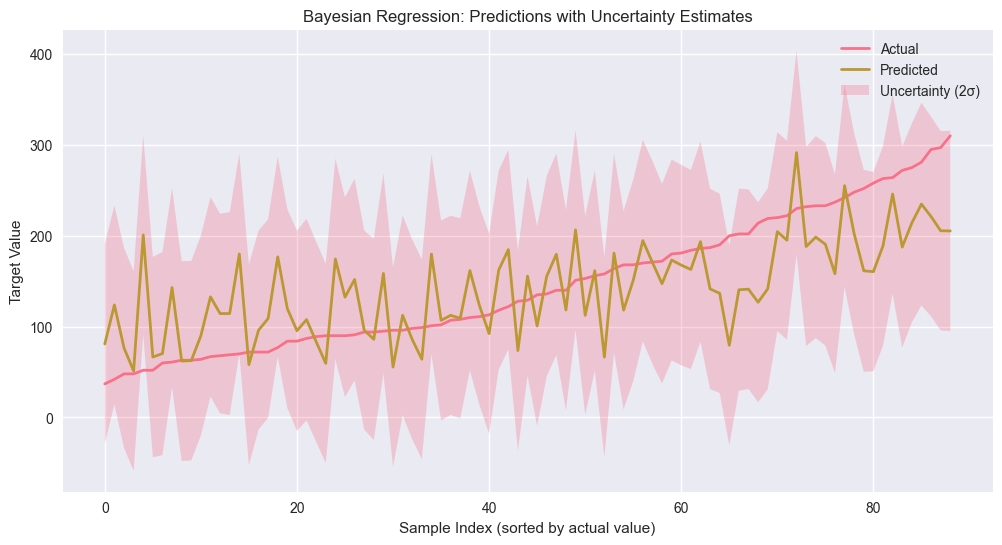

In [124]:
# Plot predictions with uncertainty
plt.figure(figsize=(12, 6))

# Sort for better visualization
sort_idx = np.argsort(y_test)
y_test_sorted = y_test[sort_idx]
y_pred_sorted = y_mean[sort_idx]
y_std_sorted = y_std[sort_idx]

plt.plot(y_test_sorted, label="Actual", linewidth=2)
plt.plot(y_pred_sorted, label="Predicted", linewidth=2)
plt.fill_between(
    range(len(y_pred_sorted)),
    y_pred_sorted - 2 * y_std_sorted,
    y_pred_sorted + 2 * y_std_sorted,
    alpha=0.3,
    label="Uncertainty (2σ)",
)
plt.xlabel("Sample Index (sorted by actual value)")
plt.ylabel("Target Value")
plt.title("Bayesian Regression: Predictions with Uncertainty Estimates")
plt.legend()
plt.grid(True)
plt.show()

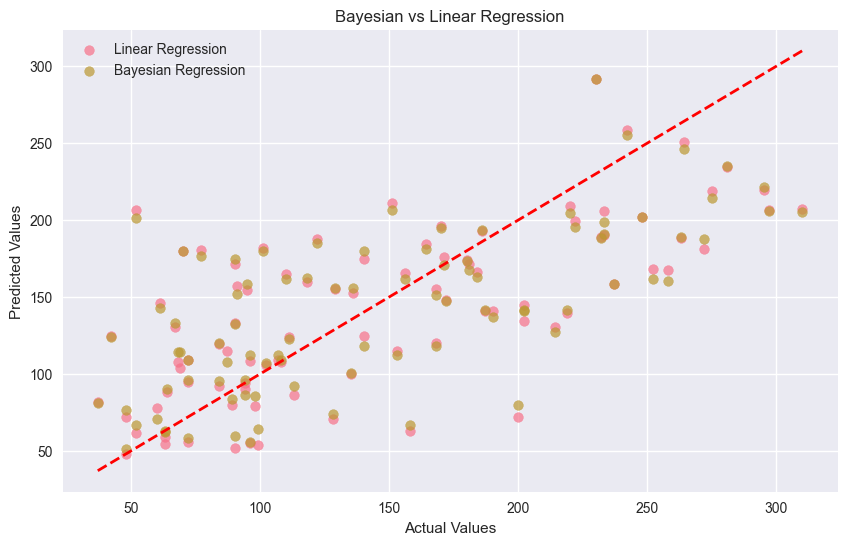

In [125]:
# Compare with regular linear regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, multiple_pred, alpha=0.7, label="Linear Regression")
plt.scatter(y_test, bayesian_pred, alpha=0.7, label="Bayesian Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Bayesian vs Linear Regression")
plt.legend()
plt.grid(True)
plt.show()

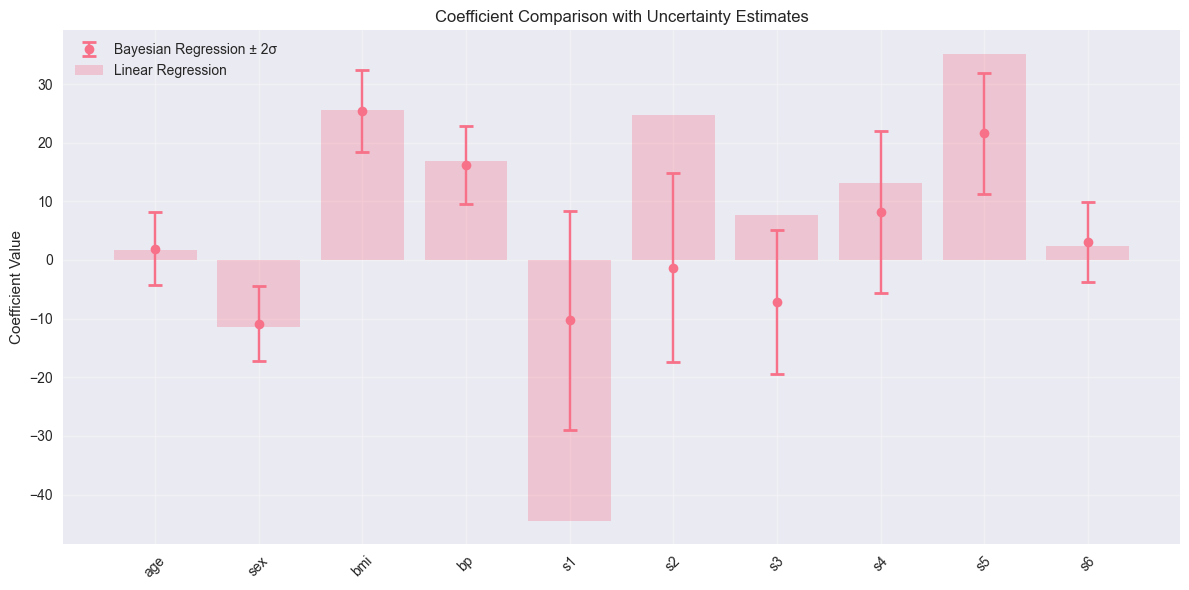

In [126]:
# Compare coefficients with uncertainty
plt.figure(figsize=(12, 6))
x_pos = np.arange(len(feature_names))

# Get Bayesian regression coefficients and their standard deviations
coef_means = bayesian_reg.coef_
coef_stds = np.sqrt(
    bayesian_reg.sigma_.diagonal()
)  # Standard deviations of coefficients

plt.errorbar(
    x_pos,
    coef_means,
    yerr=2 * coef_stds,
    fmt="o",
    capsize=5,
    capthick=2,
    label="Bayesian Regression ± 2σ",
)
plt.bar(x_pos, multiple_lr.coef_, alpha=0.3, label="Linear Regression")

plt.xticks(x_pos, feature_names, rotation=45)
plt.ylabel("Coefficient Value")
plt.title("Coefficient Comparison with Uncertainty Estimates")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### 📊 Stepwise Regression

<small>

Stepwise Regression is a **variable selection method** used in multiple regression analysis.  
It helps identify the most significant predictors for the dependent variable by **automatically adding or removing predictors** based on statistical criteria.

---

##### 🔹 Key Idea
Instead of using all predictors (which may cause overfitting or multicollinearity), Stepwise Regression selects the **best subset of variables**.

It works by:
1. **Adding** variables that improve the model significantly.
2. **Removing** variables that do not contribute much.

---

##### 🔹 Types of Stepwise Regression

1. **Forward Selection**  
   - Start with no variables in the model.  
   - Add variables one by one based on their statistical significance (e.g., p-value, AIC, BIC).  
   - Stop when no further significant improvement occurs.

2. **Backward Elimination**  
   - Start with all variables included.  
   - Remove the least significant variable (highest p-value).  
   - Continue until only significant predictors remain.

3. **Bidirectional (Stepwise) Selection**  
   - Combination of **forward selection** and **backward elimination**.  
   - At each step, the algorithm may **add or remove** a predictor depending on the statistical significance.

---

##### 🔹 Mathematical Representation


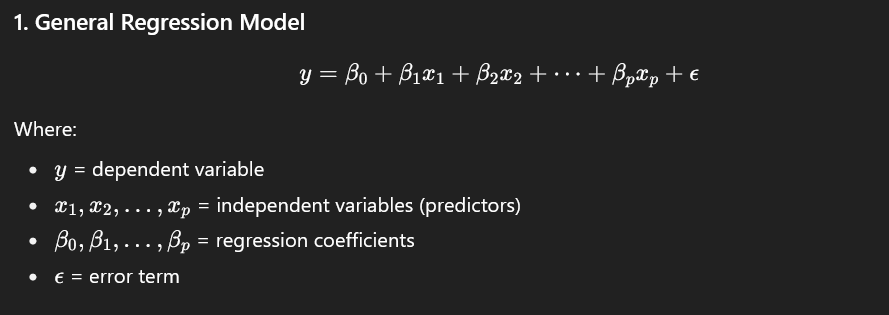
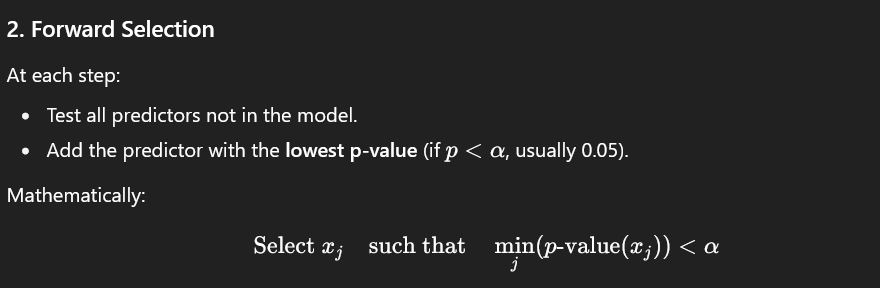
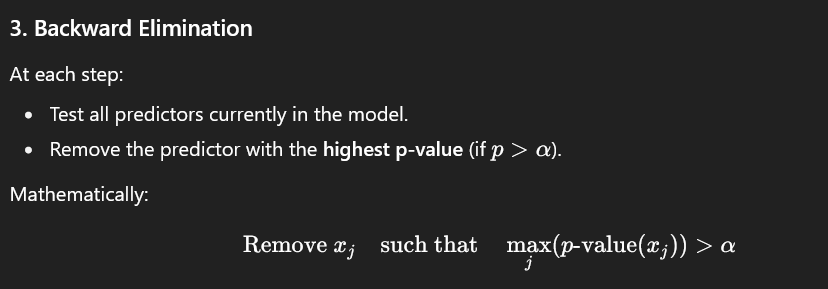
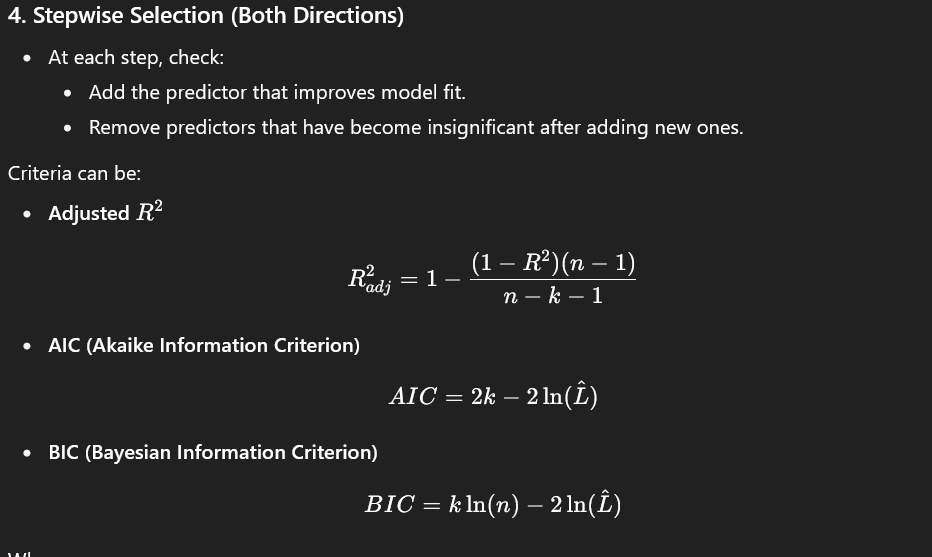

Selection is usually based on:
- **p-values** from t-tests  
- **F-statistics** for model comparison  
- **Information Criteria** (AIC, BIC)

---

##### 🔹 Advantages
- Automates variable selection process.  
- Useful when dealing with many predictors.  
- Reduces overfitting by excluding irrelevant variables.  
- Provides a simpler, more interpretable model.

---

##### 🔹 Disadvantages
- Can be **unstable** (different samples may select different variables).  
- May miss variables that are important in interaction but not individually.  
- Prone to **overfitting** if not carefully validated.  
- Ignores domain knowledge (purely statistical).

---

##### 🔹 Applications
- **Economics** → finding best predictors for GDP, inflation, etc.  
- **Medicine** → selecting significant biomarkers for disease prediction.  
- **Marketing** → identifying customer features that influence purchasing.  
- **Finance** → modeling risk factors in stock price prediction.  


</small>

STEPWISE SELECTION

In [ ]:
def stepwise_selection(X, y, initial_features=None, threshold_in=0.01, threshold_out=0.05, verbose=True):
    if initial_features is None:
        initial_features = []
    included = list(initial_features)

    while True:
        changed = False

        # Forward step
        excluded = list(set(range(X.shape[1])) - set(included))
        new_pval = pd.Series(index=excluded, dtype=float)

        for new_col in excluded:
            model = sm.OLS(y, sm.add_constant(X[:, included + [new_col]])).fit()
            new_pval[new_col] = model.pvalues[-1]  # p-value of the added feature

        if not new_pval.empty:
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed = True
                if verbose:
                    print(f"Add {best_feature} with p-value {best_pval:.6f}")

        # Backward step
        if included:
            model = sm.OLS(y, sm.add_constant(X[:, included])).fit()
            # exclude intercept (const) → pvalues[1:]
            pvalues = model.pvalues[1:]
            worst_pval = pvalues.max()
            if worst_pval > threshold_out:
                worst_feature = pvalues.idxmax()
                included.remove(included[worst_feature])
                changed = True
                if verbose:
                    print(f"Drop {worst_feature} with p-value {worst_pval:.6f}")

        if not changed:
            break

    return included

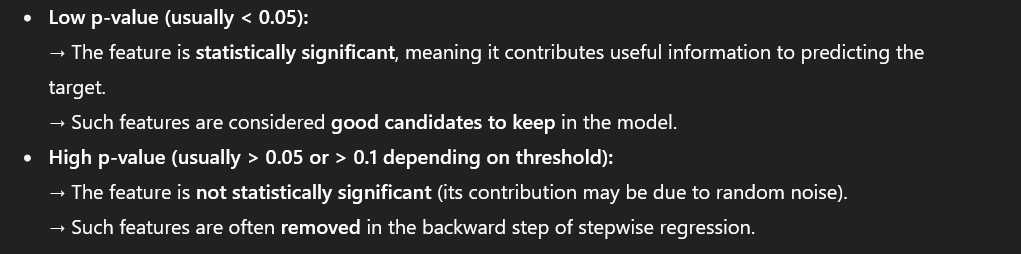

In [151]:
# Apply stepwise selection
selected_features_stepwise = stepwise_selection(X_train_scaled, y_train, verbose=True)
print(
    f"\nSelected features (Stepwise): {[feature_names[i] for i in selected_features_stepwise]}"
)

Add 2 with p-value 0.000000
Add 8 with p-value 0.000000
Add 3 with p-value 0.000053
Add 4 with p-value 0.000963
Add 5 with p-value 0.009163
Add 1 with p-value 0.001224

Selected features (Stepwise): ['bmi', 's5', 'bp', 's1', 's2', 'sex']


In [152]:
# Train model with selected features
X_train_stepwise = X_train_scaled[:, selected_features_stepwise]
X_test_stepwise = X_test_scaled[:, selected_features_stepwise]

stepwise_lr = LinearRegression()
stepwise_lr.fit(X_train_stepwise, y_train)
stepwise_pred = stepwise_lr.predict(X_test_stepwise)

print(f"R² Score with stepwise selection: {r2_score(y_test, stepwise_pred):.4f}")
print(f"MSE with stepwise selection: {mean_squared_error(y_test, stepwise_pred):.4f}")

R² Score with stepwise selection: 0.4628
MSE with stepwise selection: 2846.2905


FORWARD SELECTION

In [155]:

def forward_selection(X, y, initial_list=None, threshold_in=0.01, verbose=True):
    """Perform forward feature selection"""
    if initial_list is None:
        initial_list = []
    included = list(initial_list)
    step_count = 0

    if verbose:
        print(
            "Initial features: ",
            [feature_names[i] for i in included] if included else "None",
        )

    while True:
        changed = False
        step_count += 1

        if verbose:
            print(f"\n--- Step {step_count} ---")
            print("Testing features to add:")

        # Forward step
        excluded = list(set(range(X.shape[1])) - set(included))
        new_pval = pd.Series(index=excluded, dtype=float)

        for new_column in excluded:
            model = sm.OLS(
                y, sm.add_constant(pd.DataFrame(X[:, included + [new_column]]))
            ).fit()
            # Get the p-value for the new column (last coefficient, not intercept)
            new_pval[new_column] = model.pvalues.iloc[-1]

            if verbose:
                print(
                    f"  Feature {feature_names[new_column]}: p-value = {model.pvalues.iloc[-1]:.6f}"
                )

        if new_pval.empty:
            break  # no candidates left

        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(
                    f"ADDED: Feature {feature_names[best_feature]} with p-value {best_pval:.6f}"
                )
        else:
            if verbose:
                print("No features meet criteria for addition")

        if verbose:
            print(f"Current feature set: {[feature_names[i] for i in included]}")

        if not changed:
            if verbose:
                print("\nNo changes in this iteration. Forward selection complete.")
            break

    return included

Forward Selection: Adds the feature with the lowest p-value (strongest predictor).

In [ ]:
# Apply forward selection

selected_features_forward = forward_selection(X_train_scaled, y_train, verbose=True)
print(
    f"\nSelected features (Forward): {[feature_names[i] for i in selected_features_forward]}"
)

Initial features:  None

--- Step 1 ---
Testing features to add:
  Feature age: p-value = 0.000203
  Feature sex: p-value = 0.894013
  Feature bmi: p-value = 0.000000
  Feature bp: p-value = 0.000000
  Feature s1: p-value = 0.000161
  Feature s2: p-value = 0.003523
  Feature s3: p-value = 0.000000
  Feature s4: p-value = 0.000000
  Feature s5: p-value = 0.000000
  Feature s6: p-value = 0.000000
ADDED: Feature bmi with p-value 0.000000
Current feature set: ['bmi']

--- Step 2 ---
Testing features to add:
  Feature age: p-value = 0.042177
  Feature sex: p-value = 0.752855
  Feature bp: p-value = 0.000000
  Feature s1: p-value = 0.349365
  Feature s2: p-value = 0.936860
  Feature s3: p-value = 0.000016
  Feature s4: p-value = 0.000015
  Feature s5: p-value = 0.000000
  Feature s6: p-value = 0.000161
ADDED: Feature s5 with p-value 0.000000
Current feature set: ['bmi', 's5']

--- Step 3 ---
Testing features to add:
  Feature age: p-value = 0.558578
  Feature sex: p-value = 0.230398
  Featur

In [157]:
# Train model with selected features
X_train_forward = X_train_scaled[:, selected_features_forward]
X_test_forward = X_test_scaled[:, selected_features_forward]

forward_lr = LinearRegression()
forward_lr.fit(X_train_forward, y_train)
forward_pred = forward_lr.predict(X_test_forward)

print(f"R² Score with forward selection: {r2_score(y_test, forward_pred):.4f}")
print(f"MSE with forward selection: {mean_squared_error(y_test, forward_pred):.4f}")

R² Score with forward selection: 0.4628
MSE with forward selection: 2846.2905


BACKWARD SELECTION

In [161]:
def backward_selection(X, y, threshold_out=0.05, verbose=True):
    """Perform backward feature selection"""
    included = list(range(X.shape[1]))  # Start with all features
    step_count = 0

    if verbose:
        print("Initial features: ", [feature_names[i] for i in included])

    while True:
        changed = False
        step_count += 1

        if verbose:
            print(f"\n--- Step {step_count} ---")
            print("Testing features to remove:")

        # Build model with current included features
        X_current = pd.DataFrame(
            X[:, included], columns=[feature_names[i] for i in included]
        )
        model = sm.OLS(y, sm.add_constant(X_current)).fit()
        pvalues = model.pvalues.drop("const")  # Drop intercept

        for feature, p_val in pvalues.items():
            if verbose:
                print(f"  Feature {feature}: p-value = {p_val:.6f}")

        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            # Find index in included list
            worst_idx = included[
                [feature_names[i] for i in included].index(worst_feature)
            ]
            included.remove(worst_idx)
            if verbose:
                print(f"REMOVED: Feature {worst_feature} with p-value {worst_pval:.6f}")
        else:
            if verbose:
                print("No features meet criteria for removal")

        if verbose:
            print(f"Current feature set: {[feature_names[i] for i in included]}")

        if not changed:
            if verbose:
                print("\nNo changes in this iteration. Backward selection complete.")
            break

    return included

Backward Elimination: Removes the feature with the highest p-value (weakest predictor).

In [162]:
# Apply backward selection
selected_features_backward = backward_selection(X_train_scaled, y_train, verbose=True)
print(
    f"\nSelected features (Backward): {[feature_names[i] for i in selected_features_backward]}"
)

Initial features:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

--- Step 1 ---
Testing features to remove:
  Feature age: p-value = 0.583439
  Feature sex: p-value = 0.000475
  Feature bmi: p-value = 0.000000
  Feature bp: p-value = 0.000002
  Feature s1: p-value = 0.039700
  Feature s2: p-value = 0.155705
  Feature s3: p-value = 0.483573
  Feature s4: p-value = 0.138466
  Feature s5: p-value = 0.000155
  Feature s6: p-value = 0.507926
REMOVED: Feature age with p-value 0.583439
Current feature set: ['sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

--- Step 2 ---
Testing features to remove:
  Feature sex: p-value = 0.000547
  Feature bmi: p-value = 0.000000
  Feature bp: p-value = 0.000001
  Feature s1: p-value = 0.038448
  Feature s2: p-value = 0.146344
  Feature s3: p-value = 0.471224
  Feature s4: p-value = 0.144753
  Feature s5: p-value = 0.000123
  Feature s6: p-value = 0.464554
REMOVED: Feature s3 with p-value 0.471224
Current feature set: ['sex', 'bmi'

In [163]:
# Train model with selected features
X_train_backward = X_train_scaled[:, selected_features_backward]
X_test_backward = X_test_scaled[:, selected_features_backward]

backward_lr = LinearRegression()
backward_lr.fit(X_train_backward, y_train)
backward_pred = backward_lr.predict(X_test_backward)

print(f"R² Score with backward selection: {r2_score(y_test, backward_pred):.4f}")
print(f"MSE with backward selection: {mean_squared_error(y_test, backward_pred):.4f}")

R² Score with backward selection: 0.4628
MSE with backward selection: 2846.2905


In [164]:
# Compare with full model
print(f"R² Score with all features: {r2_score(y_test, multiple_pred):.4f}")
print(f"Number of features with all features: {X.shape[1]}")
print(f"R² Score with stepwise selection: {r2_score(y_test, stepwise_pred):.4f}")
print(f"Number of features with stepwise: {len(selected_features_stepwise)}")
print(f"R² Score with forward selection: {r2_score(y_test, forward_pred):.4f}")
print(f"Number of features with forward: {len(selected_features_forward)}")
print(f"R² Score with backward selection: {r2_score(y_test, backward_pred):.4f}")
print(f"Number of features with backward: {len(selected_features_backward)}")

R² Score with all features: 0.4526
Number of features with all features: 10
R² Score with stepwise selection: 0.4628
Number of features with stepwise: 6
R² Score with forward selection: 0.4628
Number of features with forward: 6
R² Score with backward selection: 0.4628
Number of features with backward: 6


<Figure size 1200x600 with 0 Axes>

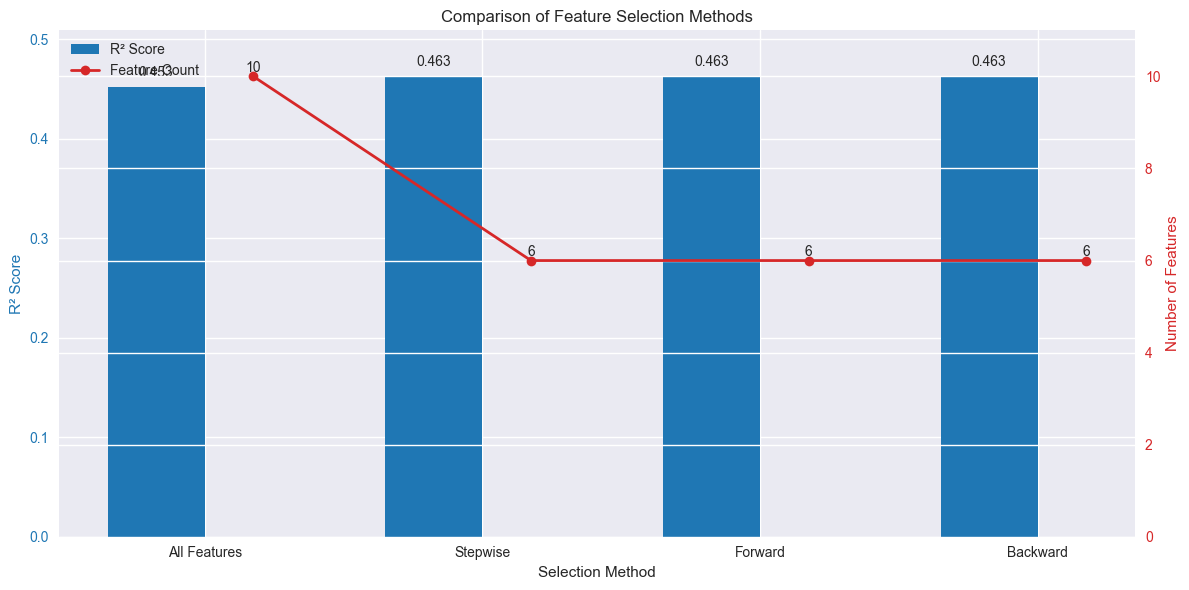

In [167]:
# Plot comparison
plt.figure(figsize=(12, 6))
models = ["All Features", "Stepwise", "Forward", "Backward"]
scores = [
    r2_score(y_test, multiple_pred),
    r2_score(y_test, stepwise_pred),
    r2_score(y_test, forward_pred),
    r2_score(y_test, backward_pred),
]
feature_counts = [
    X.shape[1],
    len(selected_features_stepwise),
    len(selected_features_forward),
    len(selected_features_backward),
]

x = np.arange(len(models))
width = 0.35

fig, ax1 = plt.subplots(figsize=(12, 6))

color = "tab:blue"
ax1.set_xlabel("Selection Method")
ax1.set_ylabel("R² Score", color=color)
bars = ax1.bar(x - width / 2, scores, width, label="R² Score", color=color)
ax1.tick_params(axis="y", labelcolor=color)
ax1.set_ylim(0, max(scores) * 1.1)

# Add value labels on bars
for i, v in enumerate(scores):
    ax1.text(i - width / 2, v + 0.01, f"{v:.3f}", ha="center")

ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Number of Features", color=color)
line = ax2.plot(
    x + width / 2,
    feature_counts,
    color=color,
    marker="o",
    linestyle="-",
    linewidth=2,
    label="Feature Count",
)
ax2.tick_params(axis="y", labelcolor=color)
ax2.set_ylim(0, max(feature_counts) * 1.1)

# Add value labels on points
for i, v in enumerate(feature_counts):
    ax2.text(i + width / 2, v + 0.1, str(v), ha="center")

plt.title("Comparison of Feature Selection Methods")
plt.xticks(x, models)
plt.legend([bars, line[0]], ["R² Score", "Feature Count"], loc="upper left")
plt.tight_layout()
plt.show()

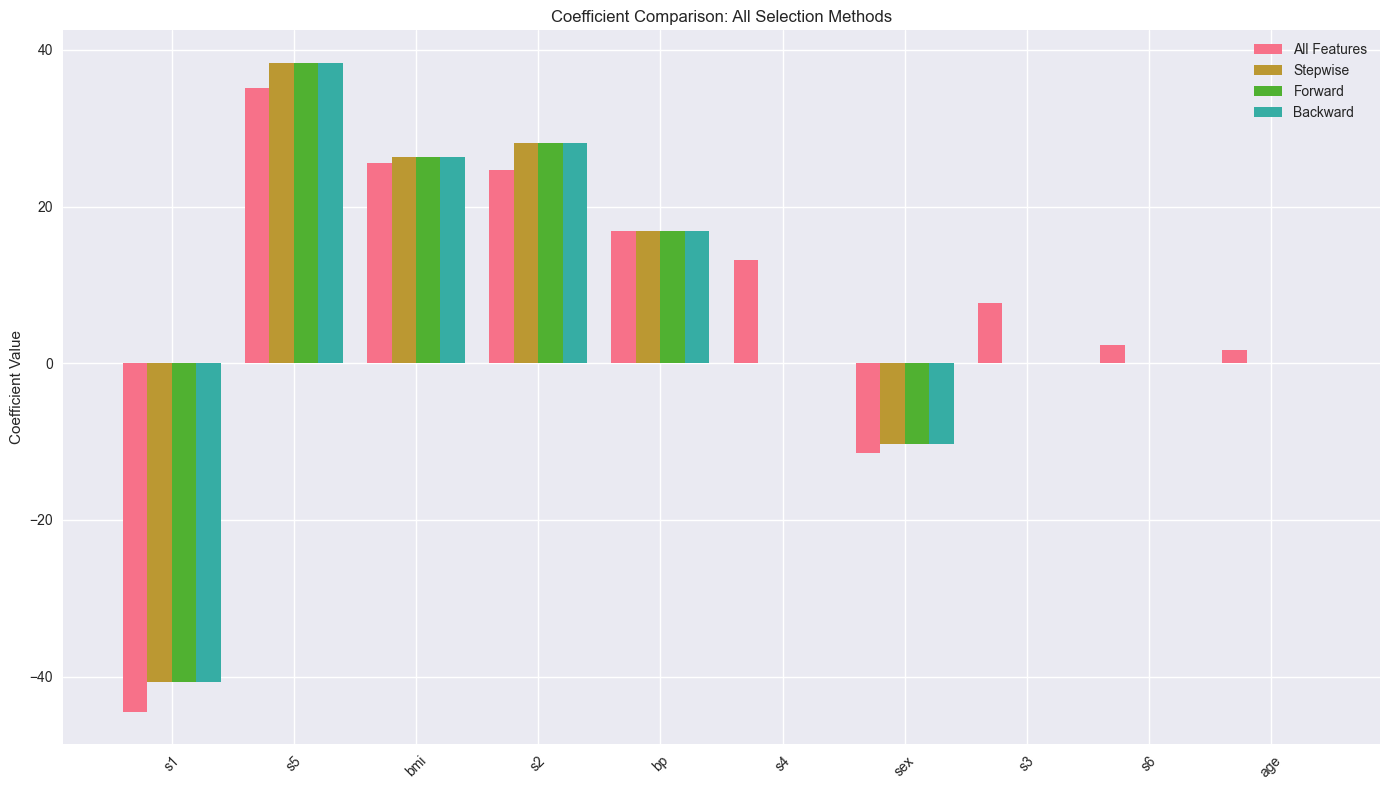

In [166]:

# Compare coefficients for all methods
plt.figure(figsize=(14, 8))

# Create a DataFrame for comparison
coef_df = pd.DataFrame({"Feature": feature_names, "All Features": multiple_lr.coef_})

# Add coefficients for each method
for i, feat_idx in enumerate(selected_features_stepwise):
    coef_df.loc[feat_idx, "Stepwise"] = stepwise_lr.coef_[i]
coef_df["Stepwise"].fillna(0, inplace=True)

for i, feat_idx in enumerate(selected_features_forward):
    coef_df.loc[feat_idx, "Forward"] = forward_lr.coef_[i]
coef_df["Forward"].fillna(0, inplace=True)

for i, feat_idx in enumerate(selected_features_backward):
    coef_df.loc[feat_idx, "Backward"] = backward_lr.coef_[i]
coef_df["Backward"].fillna(0, inplace=True)

coef_df = coef_df.sort_values("All Features", key=abs, ascending=False)

x = np.arange(len(coef_df))
width = 0.2

plt.bar(x - width * 1.5, coef_df["All Features"], width, label="All Features")
plt.bar(x - width * 0.5, coef_df["Stepwise"], width, label="Stepwise")
plt.bar(x + width * 0.5, coef_df["Forward"], width, label="Forward")
plt.bar(x + width * 1.5, coef_df["Backward"], width, label="Backward")

plt.xticks(x, coef_df["Feature"], rotation=45)
plt.ylabel("Coefficient Value")
plt.title("Coefficient Comparison: All Selection Methods")
plt.legend()
plt.tight_layout()
plt.show()

#### 📈 Non-Linear Regression


<small>

##### 🔹 Definition
**Non-linear regression** is a form of regression analysis where data is modeled by a function that is a **non-linear combination** of model parameters and depends on one or more independent variables.  
Unlike **linear regression**, where the relationship between predictors and the target variable is assumed to be linear, non-linear regression captures **curved, exponential, or more complex patterns**.

---

##### 🔹 Mathematical Representation
A general non-linear regression model can be written as:

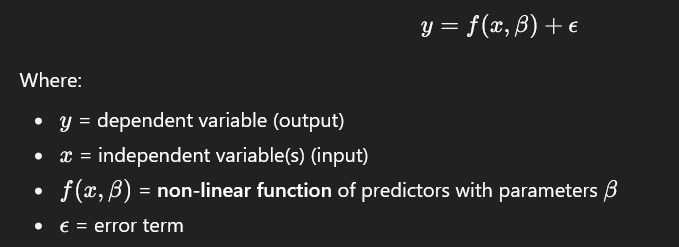

Examples of non-linear functions:
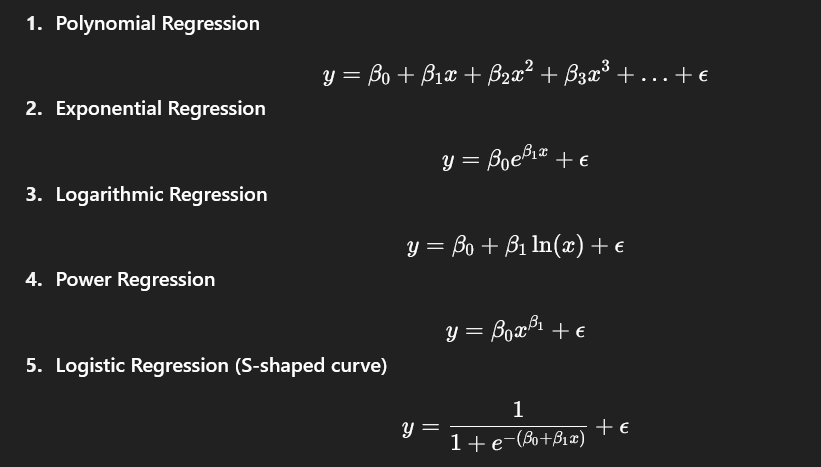

---

##### 🔹 Steps in Non-Linear Regression
1. **Choose the functional form** of the relationship (e.g., exponential, logarithmic, logistic).  
2. **Estimate parameters (\(\beta\))** using optimization techniques such as:
   - Gradient Descent  
   - Gauss-Newton method  
   - Levenberg-Marquardt algorithm  
3. **Fit the model** to minimize the sum of squared errors (SSE).  
4. **Validate the model** using metrics (e.g., R², RMSE).  

---

##### 🔹 Key Differences from Linear Regression
| Feature                | Linear Regression                        | Non-Linear Regression                       |
|-------------------------|-------------------------------------------|---------------------------------------------|
| Relationship           | Straight line                             | Curved / Complex                            |
| Equation form          | \( y = \beta_0 + \beta_1 x \)             | \( y = f(x, \beta) \)                       |
| Parameter estimation   | Ordinary Least Squares (OLS)              | Iterative optimization methods              |
| Complexity             | Simple, easy to interpret                 | More flexible but harder to interpret       |

---

##### 🔹 Applications
- Growth models (e.g., population growth, bacteria growth)  
- Dose-response curves in medicine  
- Logistic regression for classification  
- Modeling diminishing returns in economics  
- Physics and engineering (non-linear dynamics)  

---

##### 🔹 Advantages
- Captures complex, real-world relationships better than linear regression.  
- Flexible and adaptable to many domains.  

##### 🔹 Disadvantages
- Computationally intensive (requires iterative algorithms).  
- Sensitive to initial parameter guesses.  
- Risk of overfitting.  

---

</small>

In [168]:
# Create non-linear data
np.random.seed(42)
X_nonlin = np.linspace(0, 10, 100)
y_nonlin = 2 * np.sin(X_nonlin) + 0.5 * X_nonlin + np.random.normal(0, 0.5, 100)

X_train_nonlin, X_test_nonlin, y_train_nonlin, y_test_nonlin = train_test_split(
    X_nonlin, y_nonlin, test_size=0.2, random_state=42
)

In [169]:
# Reshape for sklearn
X_train_nonlin = X_train_nonlin.reshape(-1, 1)
X_test_nonlin = X_test_nonlin.reshape(-1, 1)

In [171]:
# 1. Polynomial regression
poly_model = Pipeline(
    [("poly", PolynomialFeatures(degree=3)), ("linear", LinearRegression())]
)
poly_model.fit(X_train_nonlin, y_train_nonlin)
poly_pred_nonlin = poly_model.predict(X_test_nonlin)

In [172]:
# 2. Logarithmic transformation
log_model = Pipeline(
    [
        ("log", FunctionTransformer(np.log1p, validate=True)),
        ("linear", LinearRegression()),
    ]
)
log_model.fit(X_train_nonlin, y_train_nonlin)
log_pred_nonlin = log_model.predict(X_test_nonlin)

In [173]:
# 3. Exponential transformation
exp_model = Pipeline(
    [
        ("exp", FunctionTransformer(np.exp, validate=True)),
        ("linear", LinearRegression()),
    ]
)
exp_model.fit(X_train_nonlin, y_train_nonlin)
exp_pred_nonlin = exp_model.predict(X_test_nonlin)

In [177]:
# 4. Sine transformation
sin_model = Pipeline(
    [
        ("sin", FunctionTransformer(np.sin, validate=True)),
        ("linear", LinearRegression()),
    ]
)
sin_model.fit(X_train_nonlin, y_train_nonlin)
sin_pred_nonlin = sin_model.predict(X_test_nonlin)

In [178]:
# Evaluate models
models_nonlin = {
    "Polynomial": poly_pred_nonlin,
    "Logarithmic": log_pred_nonlin,
    "Exponential": exp_pred_nonlin,
    "Sine": sin_pred_nonlin,
}

In [179]:
print("Non-linear regression performance:")
for name, pred in models_nonlin.items():
    r2 = r2_score(y_test_nonlin, pred)
    mse = mean_squared_error(y_test_nonlin, pred)
    print(f"{name}: R² = {r2:.4f}, MSE = {mse:.4f}")

Non-linear regression performance:
Polynomial: R² = 0.6014, MSE = 2.0226
Logarithmic: R² = 0.3892, MSE = 3.0997
Exponential: R² = 0.1858, MSE = 4.1318
Sine: R² = 0.4990, MSE = 2.5422


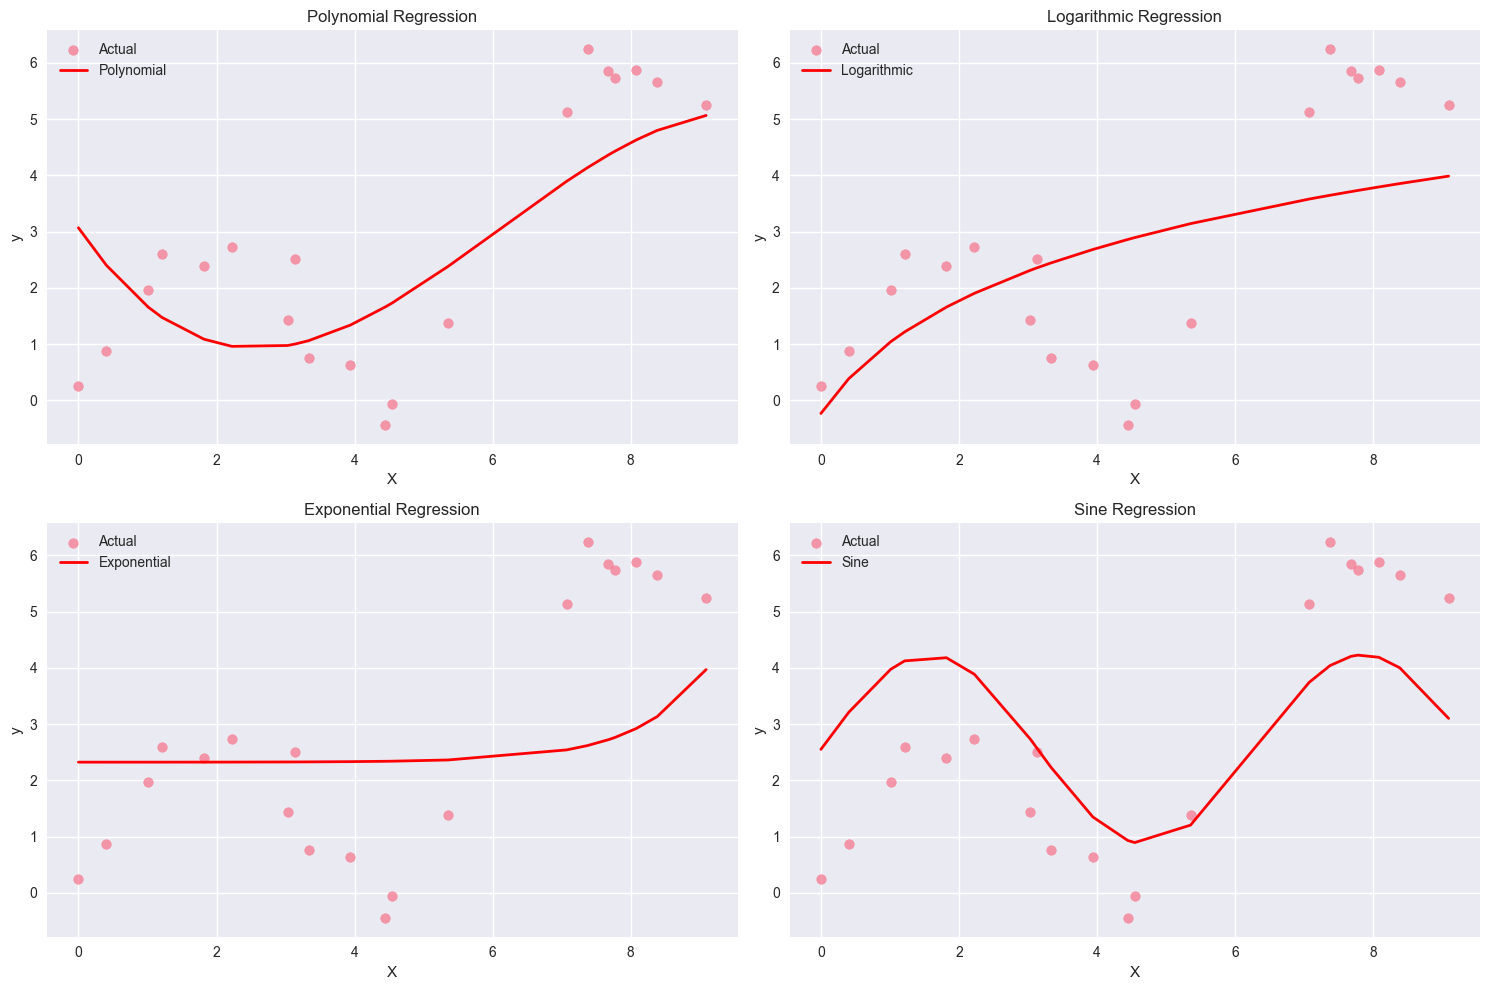

In [180]:
# Plot the results
plt.figure(figsize=(15, 10))

# Sort for plotting
sort_idx = np.argsort(X_test_nonlin.flatten())
X_sorted = X_test_nonlin[sort_idx].flatten()

plt.subplot(2, 2, 1)
plt.scatter(X_test_nonlin, y_test_nonlin, alpha=0.7, label="Actual")
plt.plot(X_sorted, poly_pred_nonlin[sort_idx], "r-", label="Polynomial", linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression")
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.scatter(X_test_nonlin, y_test_nonlin, alpha=0.7, label="Actual")
plt.plot(X_sorted, log_pred_nonlin[sort_idx], "r-", label="Logarithmic", linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Logarithmic Regression")
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.scatter(X_test_nonlin, y_test_nonlin, alpha=0.7, label="Actual")
plt.plot(X_sorted, exp_pred_nonlin[sort_idx], "r-", label="Exponential", linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Exponential Regression")
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.scatter(X_test_nonlin, y_test_nonlin, alpha=0.7, label="Actual")
plt.plot(X_sorted, sin_pred_nonlin[sort_idx], "r-", label="Sine", linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Sine Regression")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


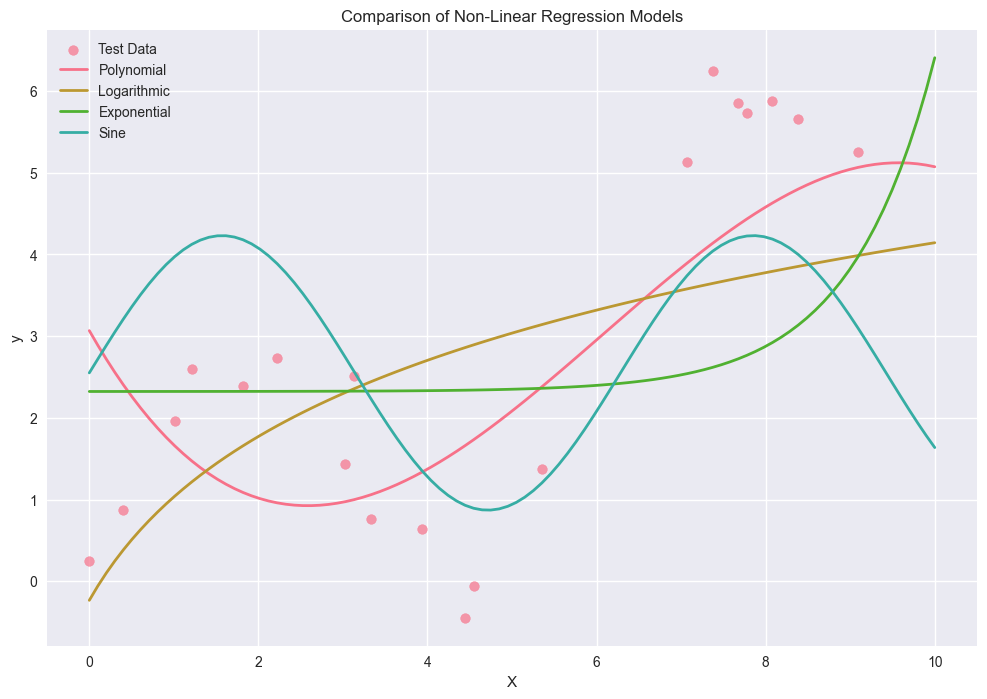

In [176]:
# Compare all models
X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
y_poly_plot = poly_model.predict(X_plot)
y_log_plot = log_model.predict(X_plot)
y_exp_plot = exp_model.predict(X_plot)
y_sin_plot = sin_model.predict(X_plot)

plt.figure(figsize=(12, 8))
plt.scatter(X_test_nonlin, y_test_nonlin, alpha=0.7, label="Test Data")
plt.plot(X_plot, y_poly_plot, label="Polynomial", linewidth=2)
plt.plot(X_plot, y_log_plot, label="Logarithmic", linewidth=2)
plt.plot(X_plot, y_exp_plot, label="Exponential", linewidth=2)
plt.plot(X_plot, y_sin_plot, label="Sine", linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Comparison of Non-Linear Regression Models")
plt.legend()
plt.grid(True)
plt.show()